In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import geopandas as gpd

In [2]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
survey = pd.read_excel('survey_cleaned_hand.xlsx').set_index('time')
survey = survey.iloc[:,1:]
survey.head()

age     gender      place  \
time                                                  
2020-01-29 20:41:31.534  29.0    Kobieta   warszawa   
2020-01-29 20:45:15.164  19.0    Kobieta   warszawa   
2020-01-29 20:45:34.371  19.0    Kobieta      slask   
2020-01-29 20:46:24.516  20.0    Kobieta  sosnowiec   
2020-01-29 20:46:39.226  17.0  Mężczyzna    gorlice   

                                        relationship economic  \
time                                                            
2020-01-29 20:41:31.534  Jestem w związku małżeńskim    Dobra   
2020-01-29 20:45:15.164                          Nie    Dobra   
2020-01-29 20:45:34.371                          Tak    Dobra   
2020-01-29 20:46:24.516                          Tak  Średnia   
2020-01-29 20:46:39.226                          Nie    Dobra   

                        first_intercourse  age_first_intercourse  \
time                                                               
2020-01-29 20:41:31.534               Tak                   19.0   
2020-01-29 20:45:15.164               Tak                   17.0   
2020-01-29 20:45:34.371               Tak                   19.0   
2020-01-29 20:46:24.516               Tak                   20.0   
2020-01-29 20:46:39.226               Nie                    NaN   

                                       ever_experienced  \
time                                                      
2020-01-29 20:41:31.534  comment, sexting, exhib, touch   
2020-01-29 20:45:15.164                           touch   
2020-01-29 20:45:34.371                         nothing   
2020-01-29 20:46:24.516  comment, sexting, exhib, touch   
2020-01-29 20:46:39.226                         sexting   

                                                       ever_bullied religious  \
time                                                                            
2020-01-29 20:41:31.534               nie, nigdy mnie nie dręczono.       Tak   
2020-01-29 20:45:15.164               nie, nigdy mnie nie dręczono.       Tak   
2020-01-29 20:45:34.371                                     wyglądu       Tak   
2020-01-29 20:46:24.516                               wyglądu, wagi       Nie   
2020-01-29 20:46:39.226  żadne z powyższych., poglądów politycznych       Nie   

                             church_freq  religion_impact_sex_life_0-10  \
time                                                                      
2020-01-29 20:41:31.534  1: Okazjonalnie                              6   
2020-01-29 20:45:15.164  1: Okazjonalnie                              0   
2020-01-29 20:45:34.371       2: Czasami                              4   
2020-01-29 20:46:24.516  1: Okazjonalnie                              0   
2020-01-29 20:46:39.226         0: Nigdy                              2   

                                                            religion_impact_sex_life_open  \
time                                                                                        
2020-01-29 20:41:31.534  Pewnie więcej bym spróbowała gdyby nie to przed stałym zwiazkiem   
2020-01-29 20:45:15.164                                                        Neutralnie   
2020-01-29 20:45:34.371                                                        Negatywnie   
2020-01-29 20:46:24.516                                                        Negatywnie   
2020-01-29 20:46:39.226                                                        Neutralnie   

                         first_heard_any_sex_activity  \
time                                                    
2020-01-29 20:41:31.534                           4.0   
2020-01-29 20:45:15.164                           9.0   
2020-01-29 20:45:34.371                          12.0   
2020-01-29 20:46:24.516                          13.0   
2020-01-29 20:46:39.226                          12.0   

                         first_heard_how_conception  \
time                                                  
2020-01-29 20:41:31.534              

In [4]:
survey.columns.tolist()

['age',
 'gender',
 'place',
 'relationship',
 'economic',
 'first_intercourse',
 'age_first_intercourse',
 'ever_experienced',
 'ever_bullied',
 'religious',
 'church_freq',
 'religion_impact_sex_life_0-10',
 'religion_impact_sex_life_open',
 'first_heard_any_sex_activity',
 'first_heard_how_conception',
 'first_heard_pleasures_sex',
 'sex_info_source_parents',
 'sex_info_source_colleagues',
 'sex_info_source_school',
 'sex_info_source_social_media',
 'sex_info_source_websites',
 'sex_info_source_books_magazines',
 'sex_info_source_porn',
 'sex_info_source_doctors',
 'sex_info_source_church',
 'sexed_school',
 'sexed_school_satisfactory',
 'comfort_on_sexed_school',
 'sexed_school_orientation',
 'how_teacher_sex_orientation',
 'comfort_on_sex_talks_parents',
 'if_condom_breaks',
 'what_prevents_stds',
 'method_100%_prevents_pregnancy',
 'relationship_sexed_sex_violence',
 'relationship_sexed_stds',
 'problem_buying_contraception',
 'rich_teens_easier_care_sex_health',
 'learn_sexed_in

In [5]:
demo = ['age','gender', 'place_v', 'place_p', 'relationship','economic']

sex_exp =  ['first_intercourse', 'age_first_intercourse', 'ever_experienced', 'ever_bullied']

religion = ['religious', 'church_freq', 'religion_impact_sex_life_0-10', 'religion_impact_sex_life_open',
            'learn_sexed_in_church',  'church_topics_label_masturb', 'church_topics_label_contraception',
            'church_topics_label_abortion', 'church_topics_label_premarital', 'church_topics_label_orient',
            'church_topics_label_nfp', 'church_topics_label_pedo', 'church_topics_label_violence',
            'church_topics_label_values','church_topics_label_sin', 'church_topics_label_stis',
            'church_topics_label_porn', 'church_topics_label_in_vitro']

sexed = ['first_heard_any_sex_activity', 'first_heard_how_conception', 'first_heard_pleasures_sex', 
         'sex_info_source_parents', 'sex_info_source_colleagues', 'sex_info_source_school', 
         'sex_info_source_social_media', 'sex_info_source_websites', 'sex_info_source_books_magazines',
         'sex_info_source_porn', 'sex_info_source_doctors', 'sex_info_source_church', 'sexed_school',
         'sexed_school_satisfactory', 'comfort_on_sexed_school', 'sexed_school_orientation',
         'how_teacher_sex_orientation', 'comfort_on_sex_talks_parents',]

knowledge = ['if_condom_breaks',  'what_prevents_stds', 'method_100%_prevents_pregnancy',
                 'relationship_sexed_sex_violence', 'relationship_sexed_stds', 'problem_buying_contraception',
                 'rich_teens_easier_care_sex_health']

opinions = ['sexed_topics_yes',
 'sexed_topics_no',
 'sexed_topics_idk',
 'sexed_topics_label_masturb',
 'sexed_topics_label_contraception',
 'sexed_topics_label_abortion',
 'sexed_topics_label_idk',
 'sexed_topics_label_orient',
 'sexed_topics_label_nfp',
 'sexed_topics_label_pedophilia',
 'sexed_topics_label_violence',
 'sexed_topics_label_values',
 'sexed_topics_label_stis',
 'sexed_topics_label_porn',
 'pregnancy_label_abort',
 'pregnancy_label_adopt',
 'pregnancy_label_raise',
 'pregnancy_label_idk',
 'pregnancy_label_seek_help',
 'pregnancy_label_her_choice',
 'pregnancy_label_give_birth',
 'pregnancy_label_support']

In [6]:
#religion.append('place_v')

rsur = survey[survey.learn_sexed_in_church == 'Tak'].loc[:,religion]
rsur.head()

religious                    church_freq  \
time                                                               
2020-01-29 20:55:32.275       Tak                     2: Czasami   
2020-01-29 20:55:58.716       Tak  3: W każdą niedzielę i święta   
2020-01-29 21:01:44.528       Tak                       0: Nigdy   
2020-01-29 21:09:47.279       Nie                       0: Nigdy   
2020-01-29 21:17:00.878       Tak  3: W każdą niedzielę i święta   

                         religion_impact_sex_life_0-10  \
time                                                     
2020-01-29 20:55:32.275                              0   
2020-01-29 20:55:58.716                              0   
2020-01-29 21:01:44.528                              0   
2020-01-29 21:09:47.279                              0   
2020-01-29 21:17:00.878                              7   

                        religion_impact_sex_life_open learn_sexed_in_church  \
time                                                                          
2020-01-29 20:55:32.275                    Neutralnie                   Tak   
2020-01-29 20:55:58.716                    Neutralnie                   Tak   
2020-01-29 21:01:44.528                    Negatywnie                   Tak   
2020-01-29 21:09:47.279                    Neutralnie                   Tak   
2020-01-29 21:17:00.878                    Pozytywnie                   Tak   

                         church_topics_label_masturb  \
time                                                   
2020-01-29 20:55:32.275                        False   
2020-01-29 20:55:58.716                         True   
2020-01-29 21:01:44.528                        False   
2020-01-29 21:09:47.279                         True   
2020-01-29 21:17:00.878                        False   

                         church_topics_label_contraception  \
time                                                         
2020-01-29 20:55:32.275                              False   
2020-01-29 20:55:58.716                              False   
2020-01-29 21:01:44.528                              False   
2020-01-29 21:09:47.279                              False   
2020-01-29 21:17:00.878                              False   

                         church_topics_label_abortion  \
time                                                    
2020-01-29 20:55:32.275                         False   
2020-01-29 20:55:58.716                         False   
2020-01-29 21:01:44.528                         False   
2020-01-29 21:09:47.279                         False   
2020-01-29 21:17:00.878                         False   

                         church_topics_label_premarital  \
time                                                      
2020-01-29 20:55:32.275                           False   
2020-01-29 20:55:58.716                           False   
2020-01-29 21:01:44.528                           False   
2020-01-29 21:09:47.279                            True   
2020-01-29 21:17:00.878                           False   

                         church_topics_label_orient  church_topics_label_nfp  \
time                                                                           
2020-01-29 20:55:32.275                       False                    False   
2020-01-29 20:55:58.716                       False                    False   
2020-01-29 21:01:44.528                       False                    False   
2020-01-29 21:09:47.279                       False                    False   
2020-01-29 21:17:00.878                       False                    False   

                         church_topics_label_pedo  \
time                                                
2020-01-29 20:55:32.275                     False   
2020-01-29 20:55:58.716                     False   
2020-01-29 21:01:44.528                     False   
2020-01-29 21:09:47.279                     False   
2020-01-29 21:17:00.878                     False   

           

## Podstawowe dane

W komórce poniżej znajdziecie rozkład poszczególnych pytań na maksymalnie 20 najpopularniejszych wartości, mam nadzieję, że jest w miarę czytelny. Nie mówi nic o korelacjach, tylko opisuje poszczególne pytania. 'nan' oznacza brak odpowiedzi na dane pytanie.

Wykresy, które mogą nie być jasne:

<b>ever_experienced</b> = tutaj skróciłem odpowiedzi wg klucza:

'nothing':'nie, nic takiego mnie nie spotkało'

'comment':'niechcianych komentarzy o charakterze seksualnym',

'sexting':'niechcianych wiadomości, zdjęć lub filmów o charakterze seksualnym',

'exhib':'ktoś obnażał się przede mną lub pokazywał mi swoje miejsca intymne bez mojej zgody',

'touch':'niechcianego dotyku',

'act':'niechcianej aktywności seksualnej \(dotykania miejsc intymnych, kontaktu oralnego, waginalnego, analnego, gwałtu lub innej\)',

<b>place_v</b> = miejsce zamieszkania wg województw <br>


<b>place_pc</b> = miejsce zamieszkania wg ludności, "city" to miasta pow 250 tys, "town" - między 250 a 10 tys, village - te poniżej 10 tys. 

age


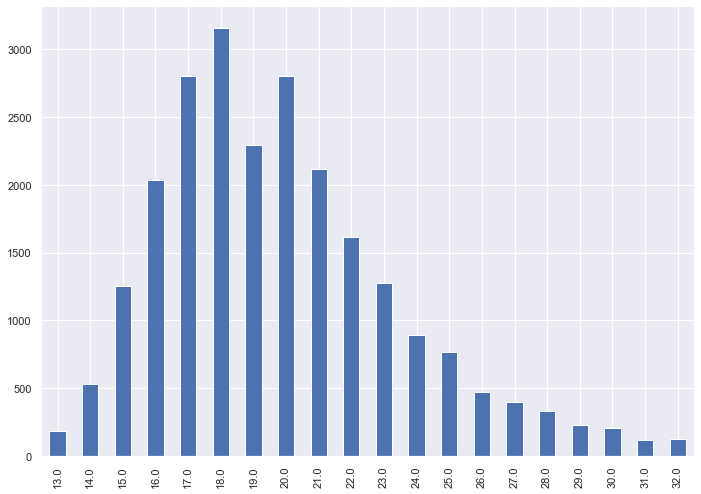

gender


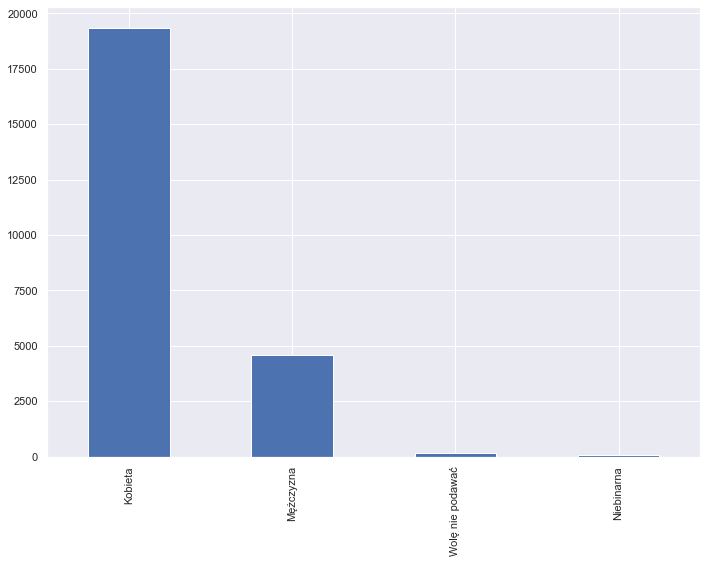

place


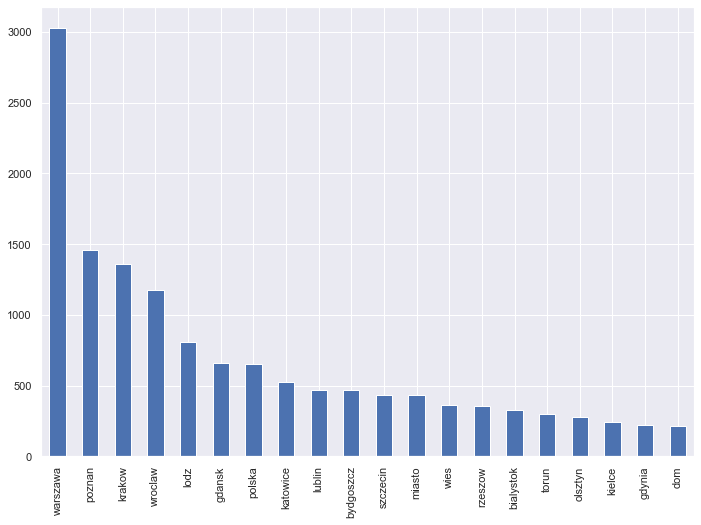

relationship


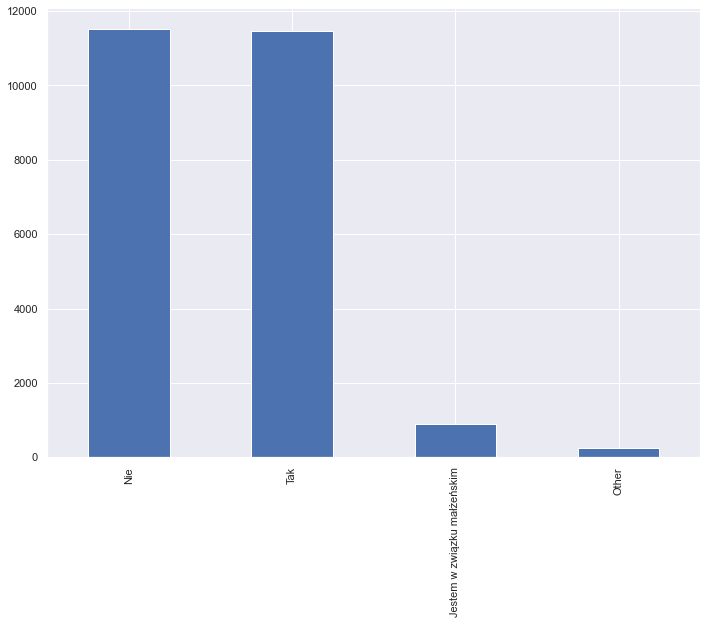

economic


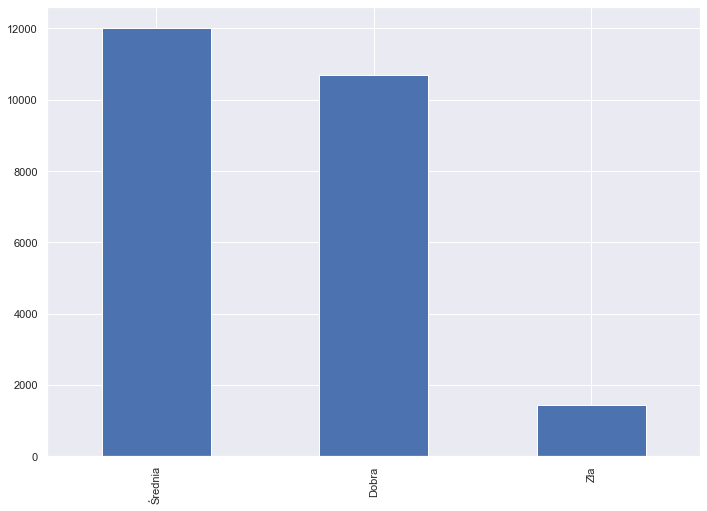

first_intercourse


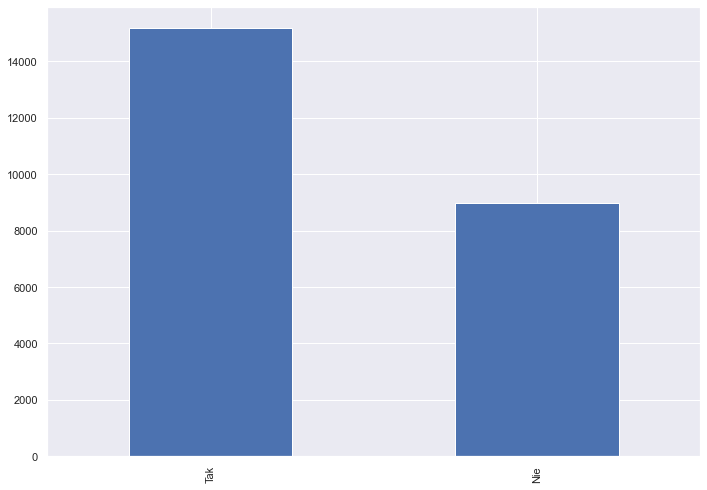

age_first_intercourse


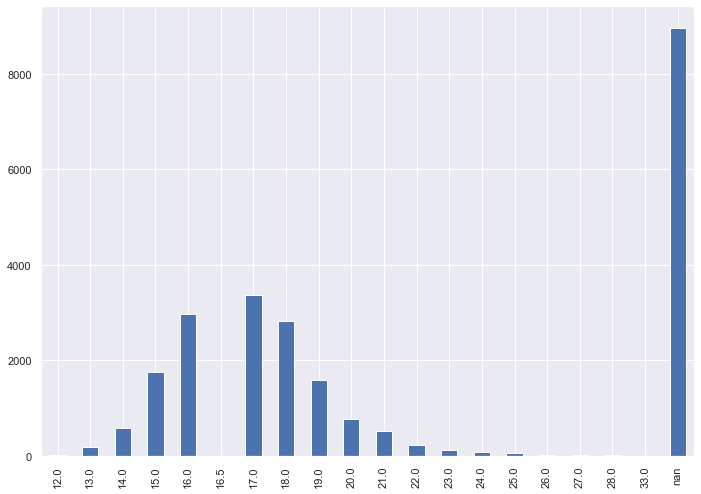

ever_experienced


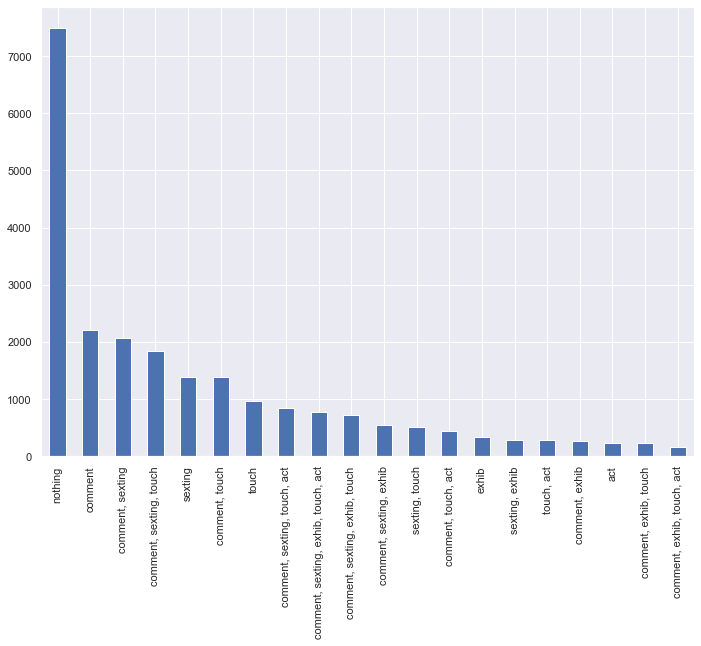

ever_bullied


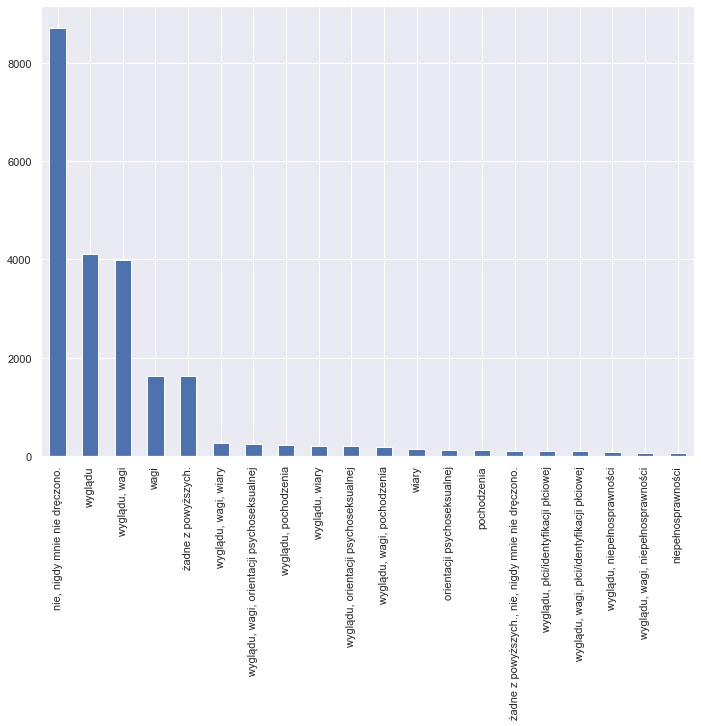

religious


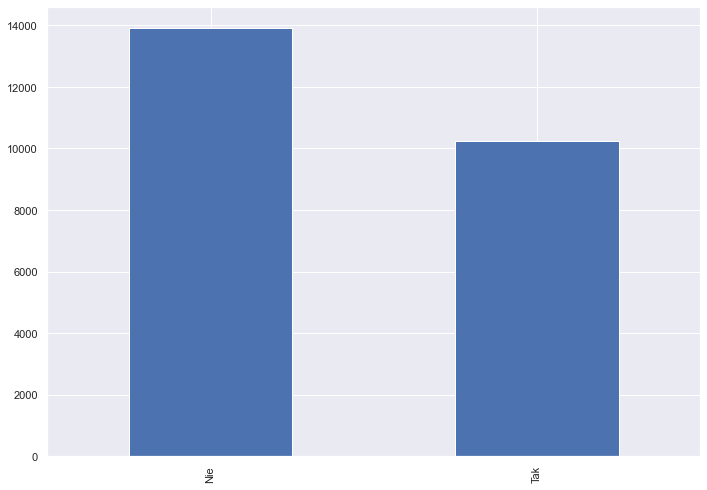

church_freq


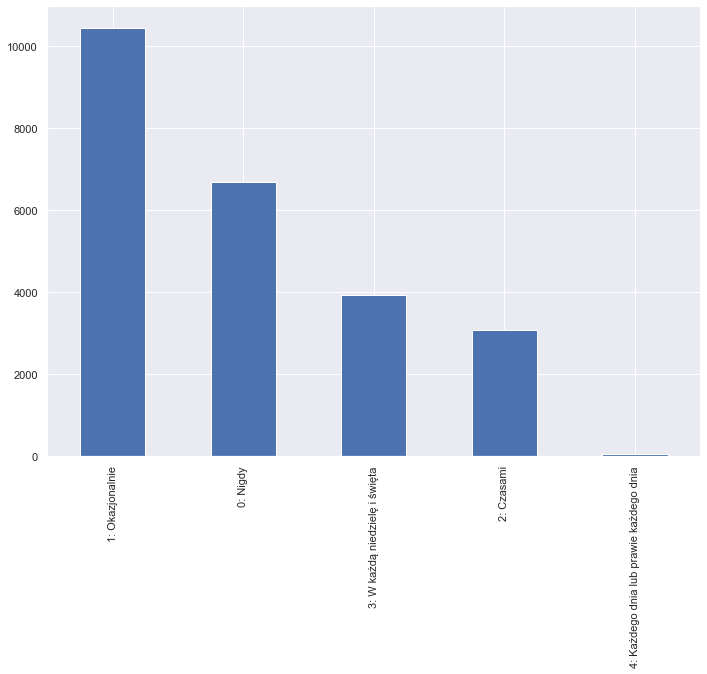

religion_impact_sex_life_0-10


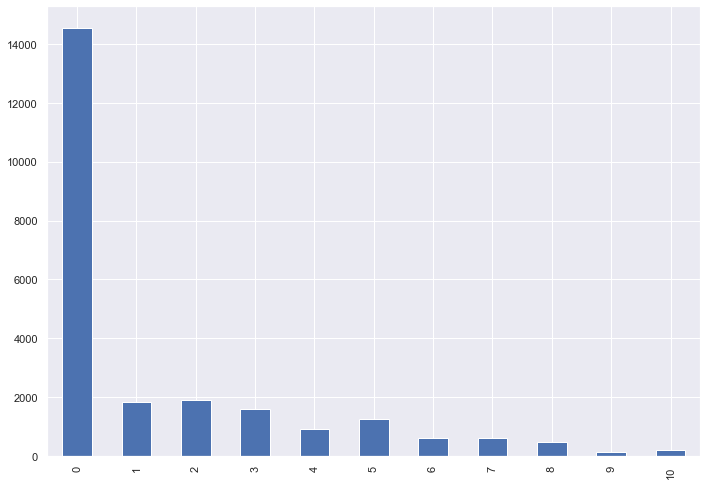

religion_impact_sex_life_open


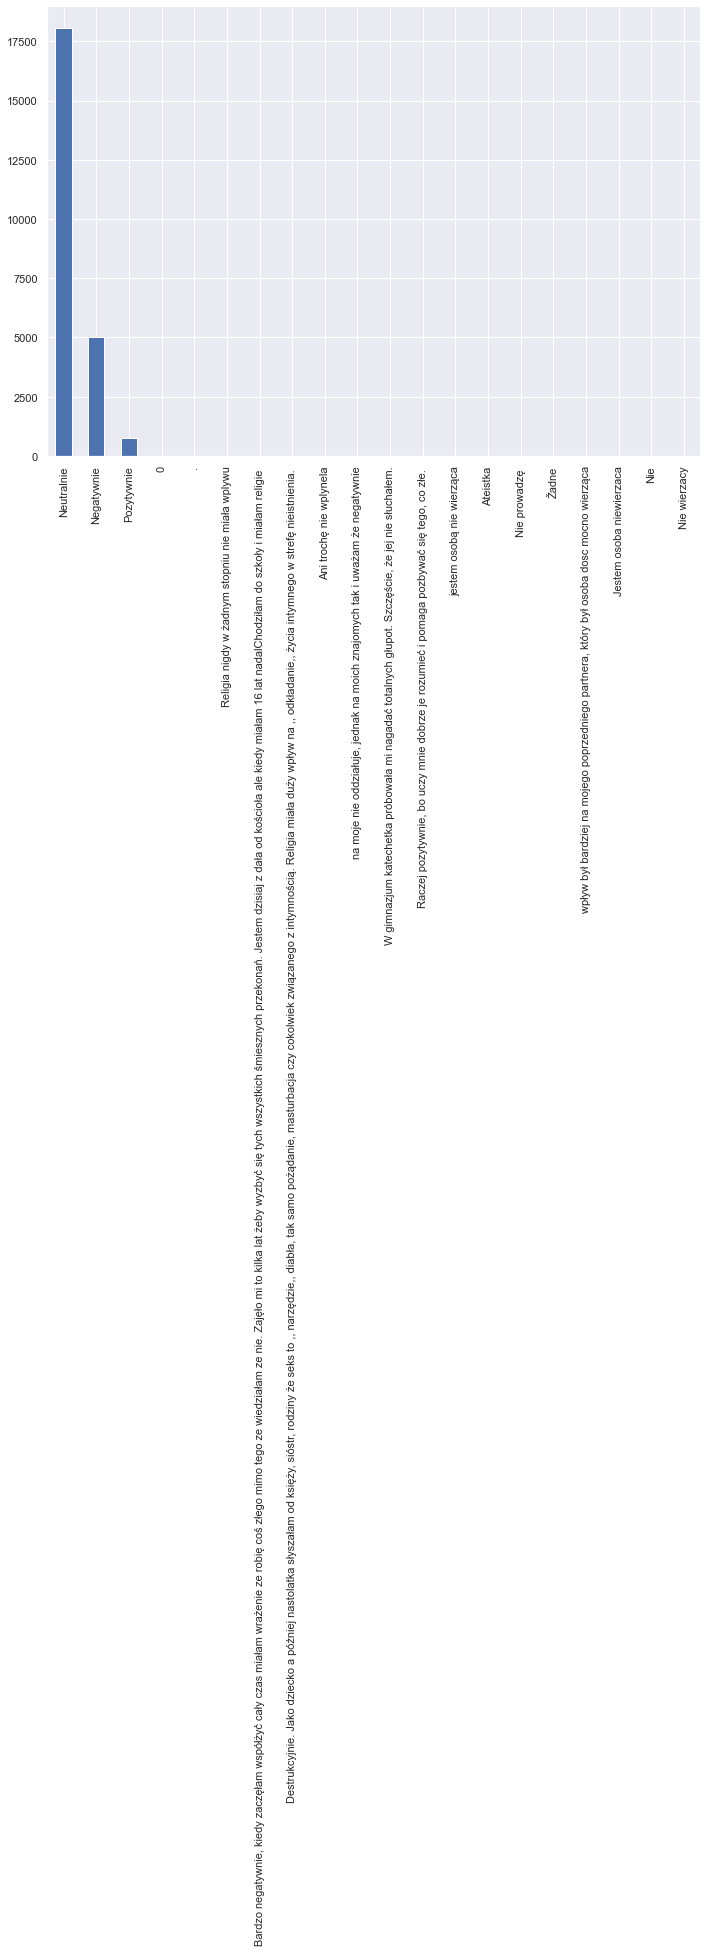

first_heard_any_sex_activity


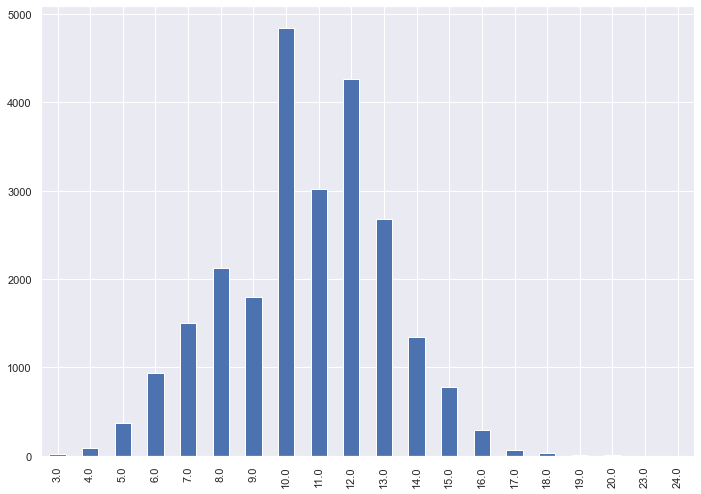

first_heard_how_conception


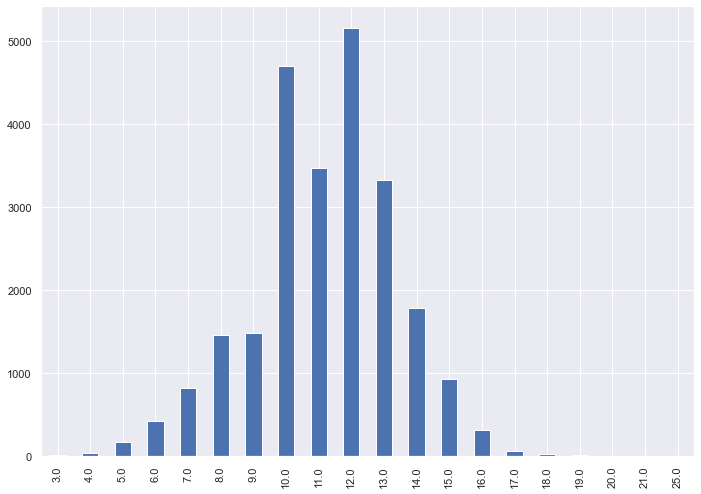

first_heard_pleasures_sex


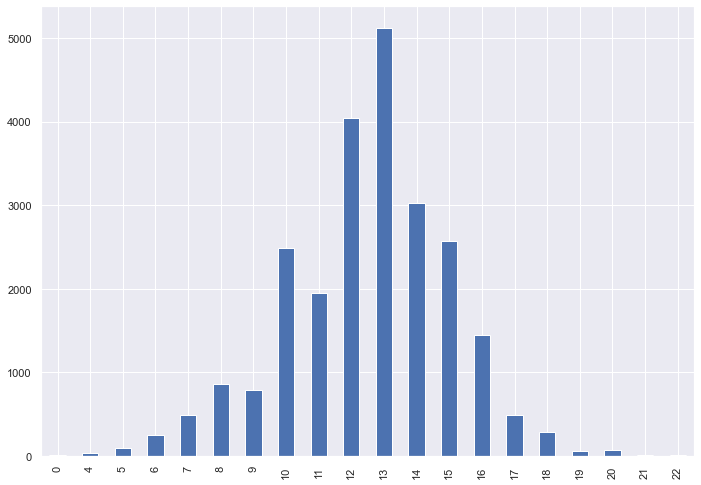

sex_info_source_parents


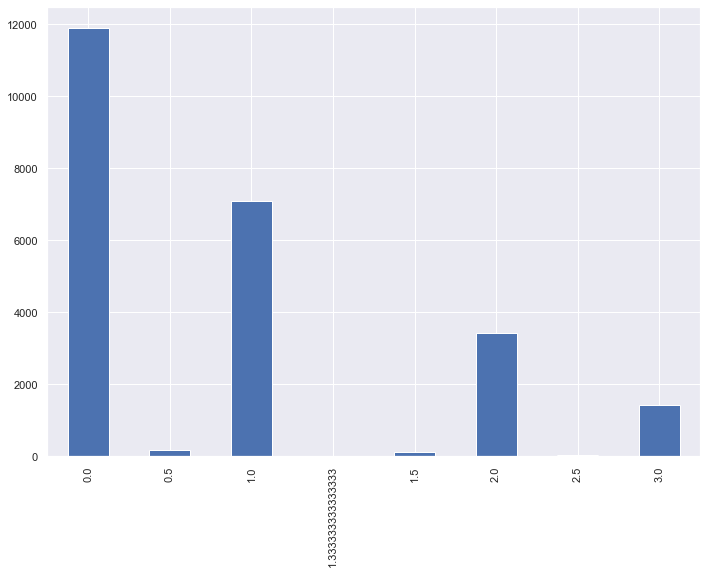

sex_info_source_colleagues


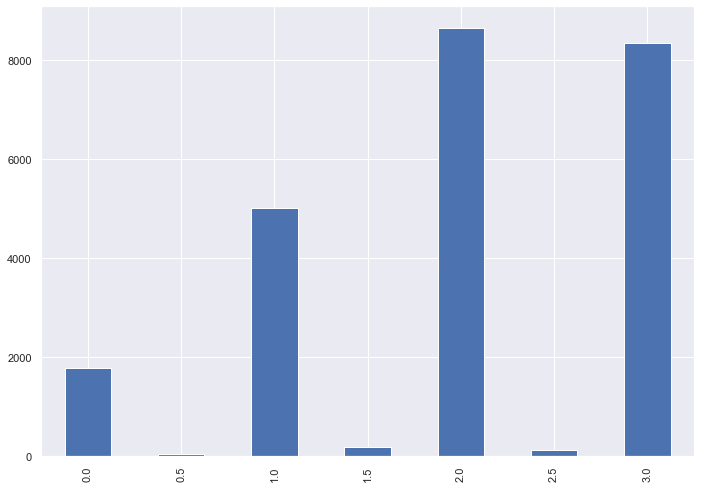

sex_info_source_school


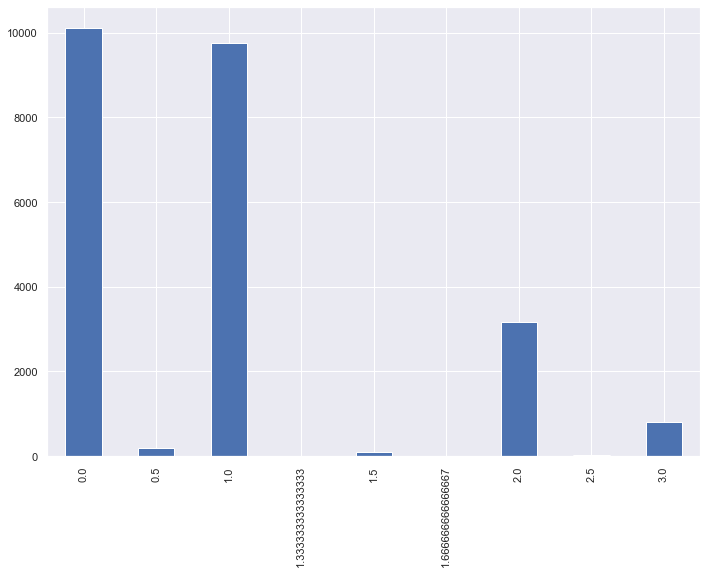

sex_info_source_social_media


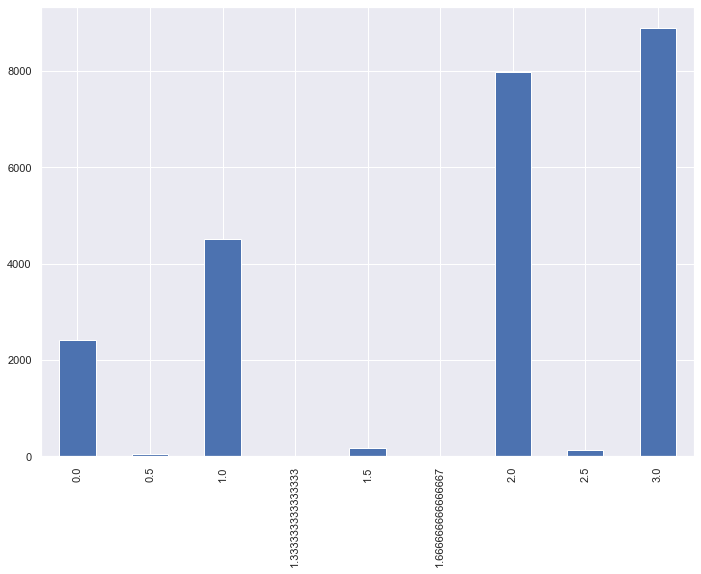

sex_info_source_websites


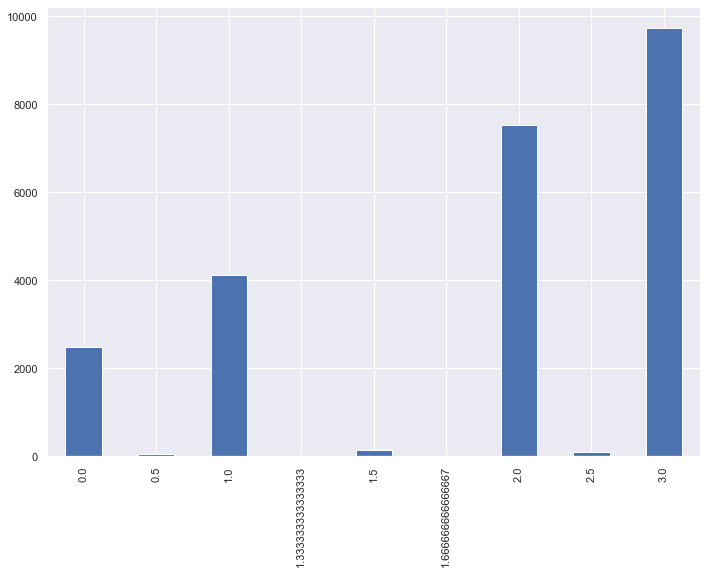

sex_info_source_books_magazines


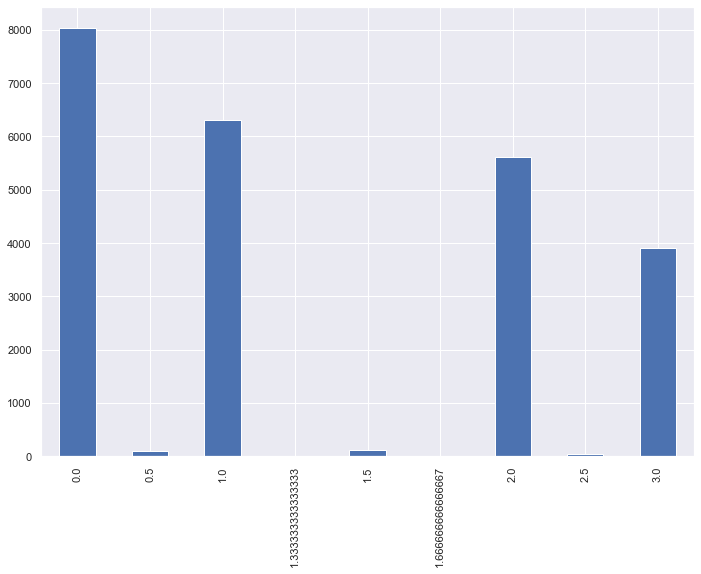

sex_info_source_porn


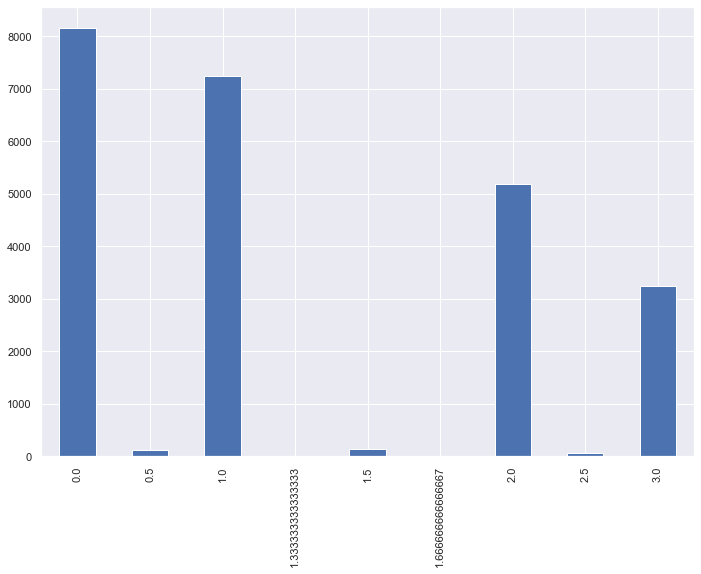

sex_info_source_doctors


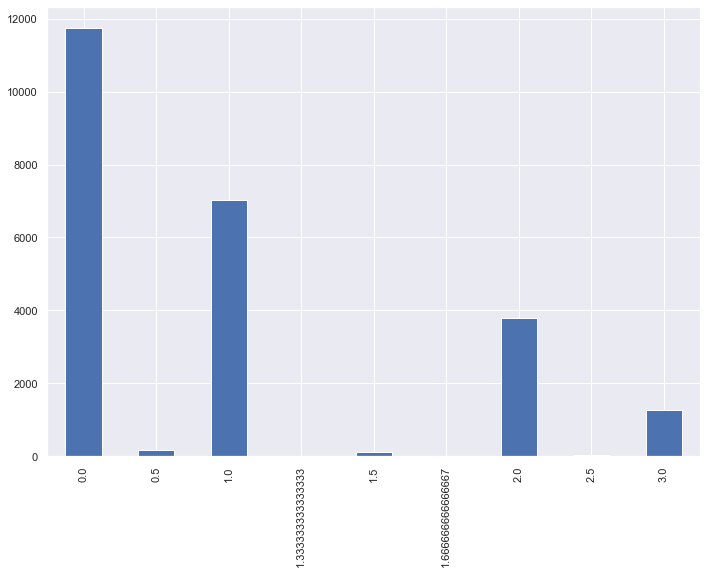

sex_info_source_church


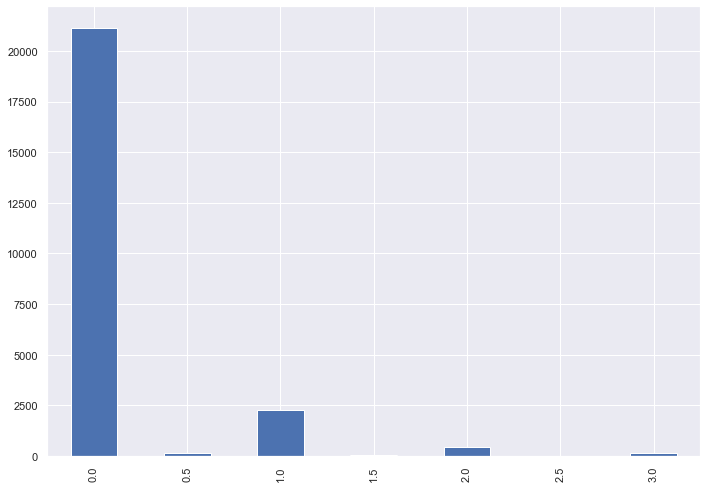

sexed_school


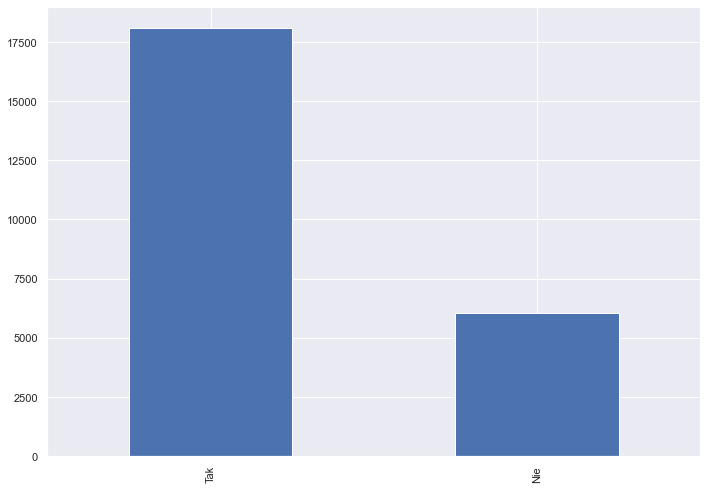

sexed_school_satisfactory


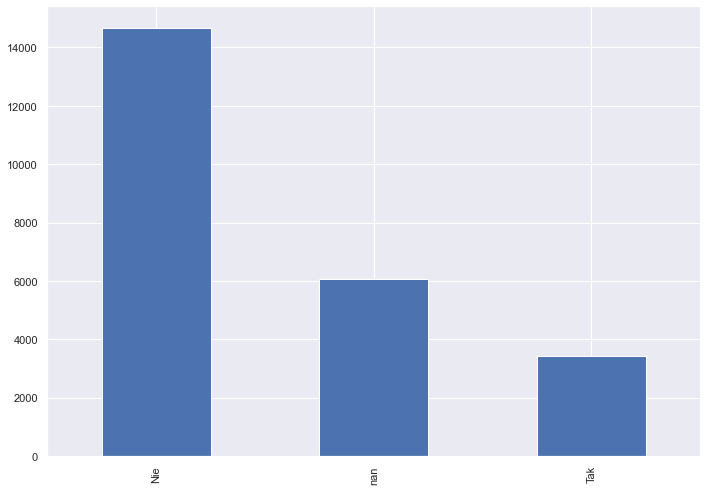

comfort_on_sexed_school


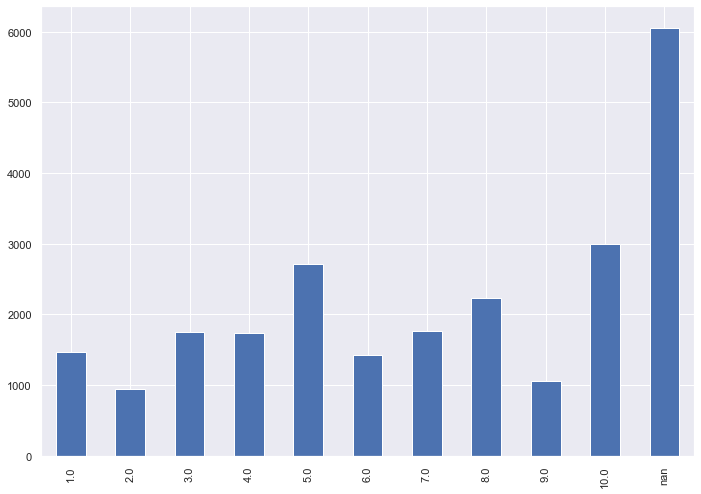

sexed_school_orientation


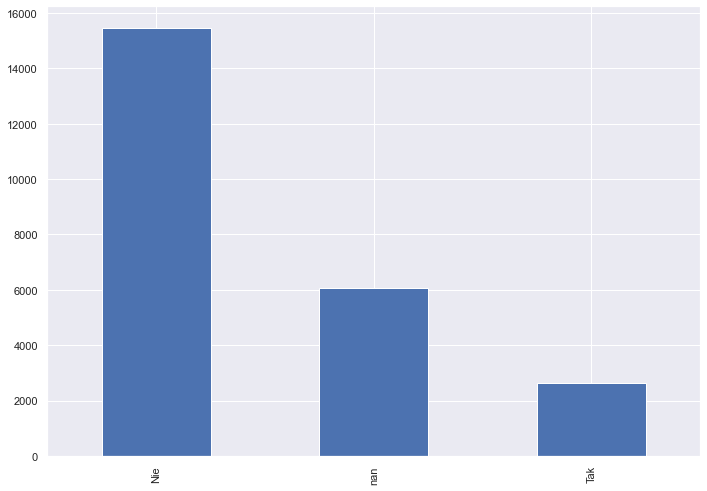

how_teacher_sex_orientation


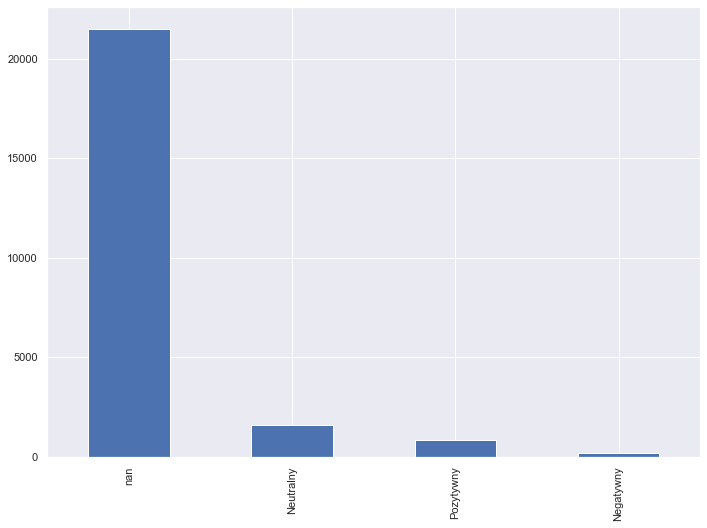

comfort_on_sex_talks_parents


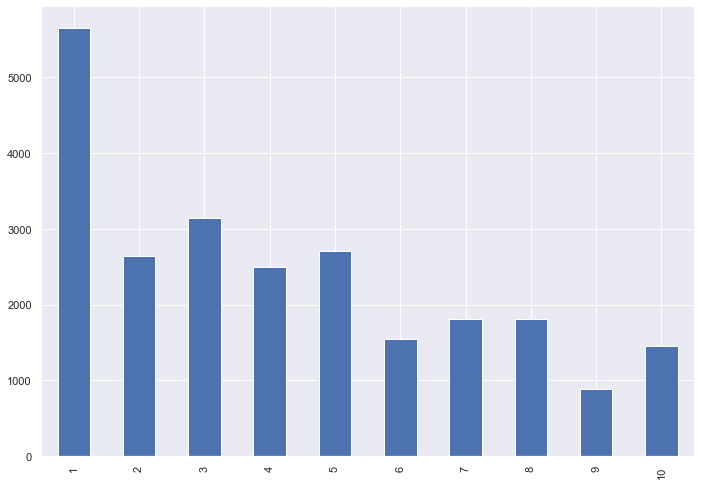

if_condom_breaks


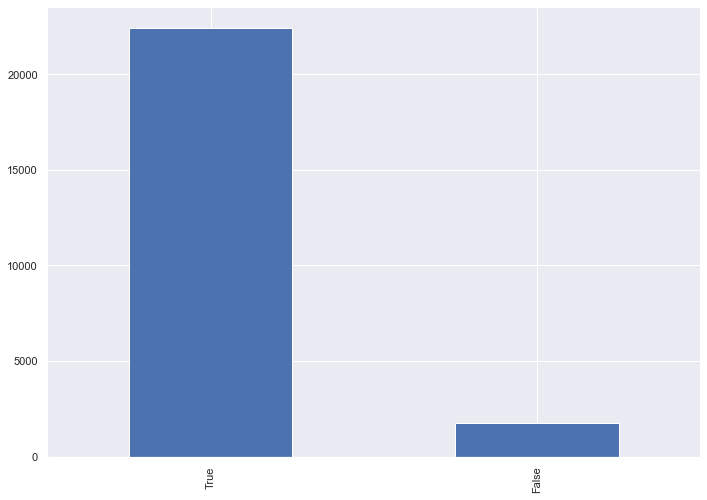

what_prevents_stds


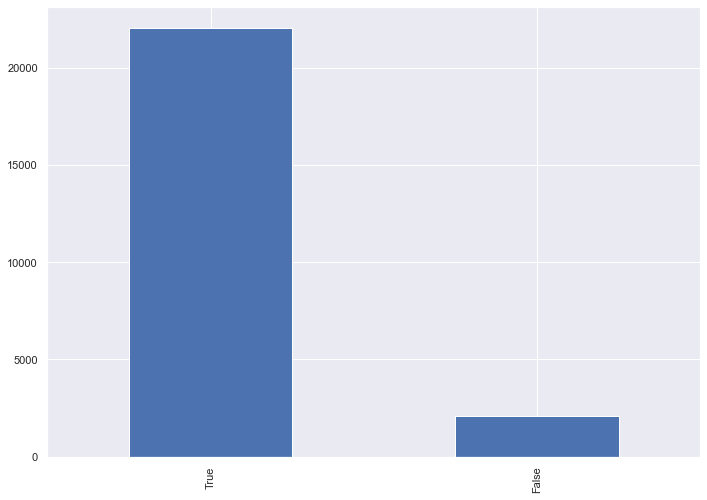

method_100%_prevents_pregnancy


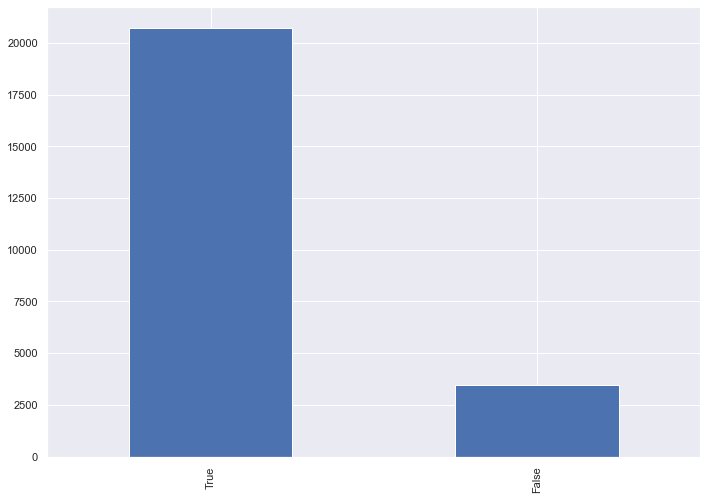

relationship_sexed_sex_violence


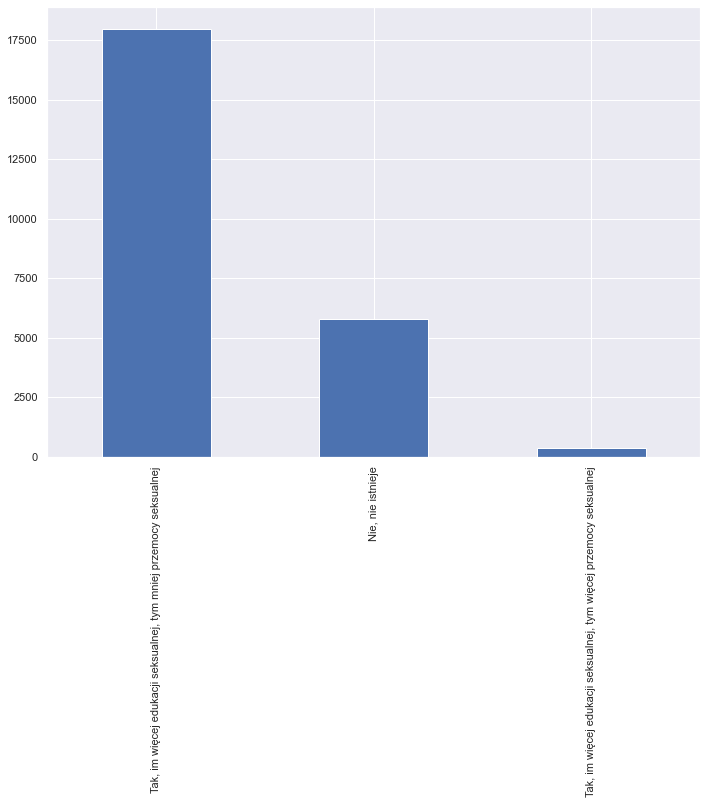

relationship_sexed_stds


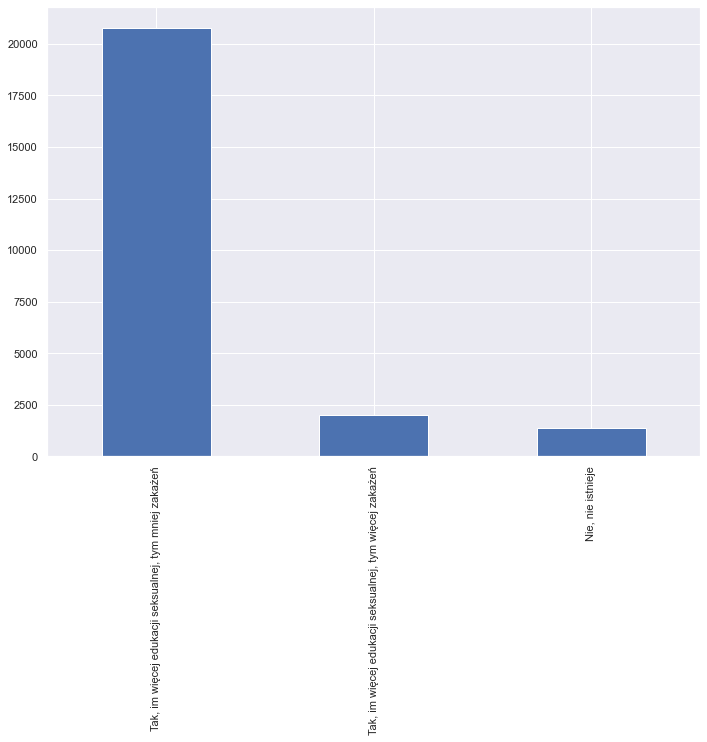

problem_buying_contraception


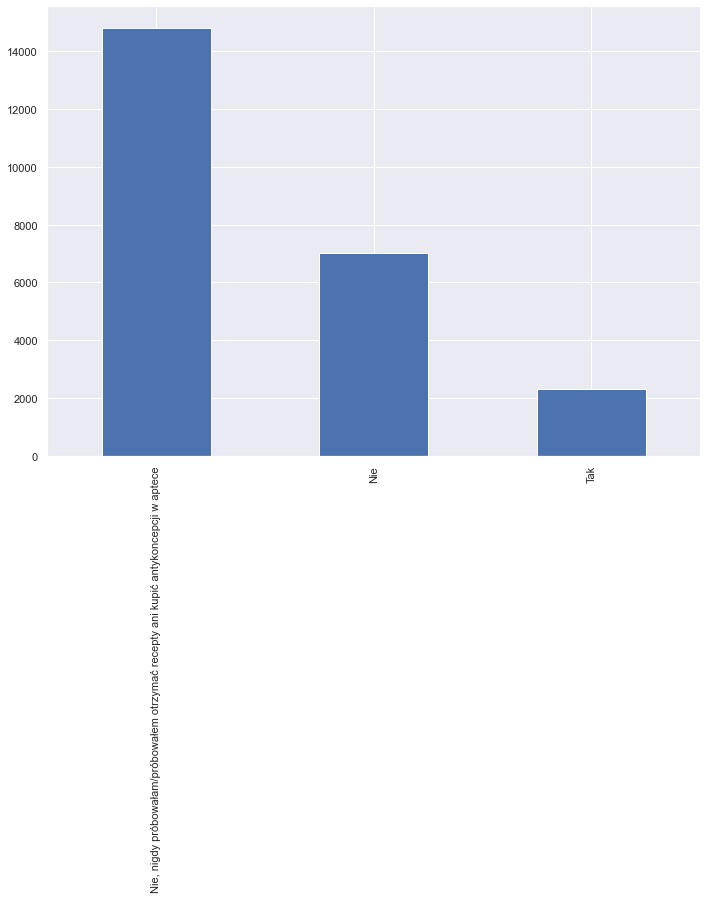

rich_teens_easier_care_sex_health


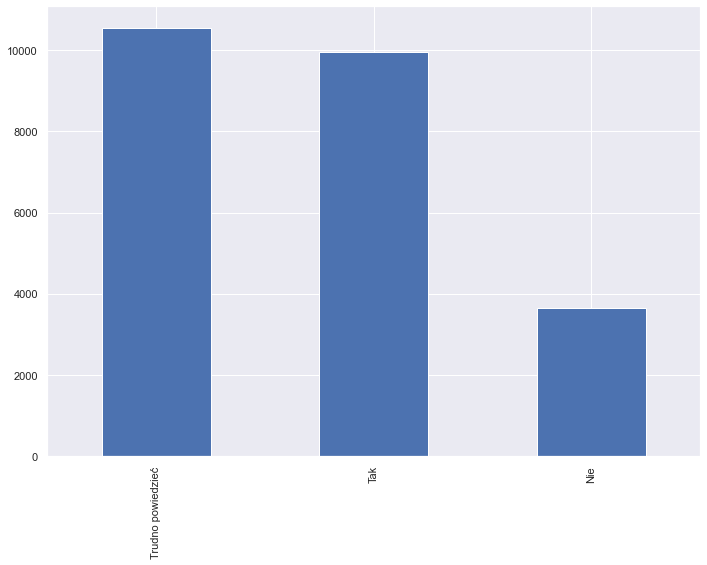

learn_sexed_in_church


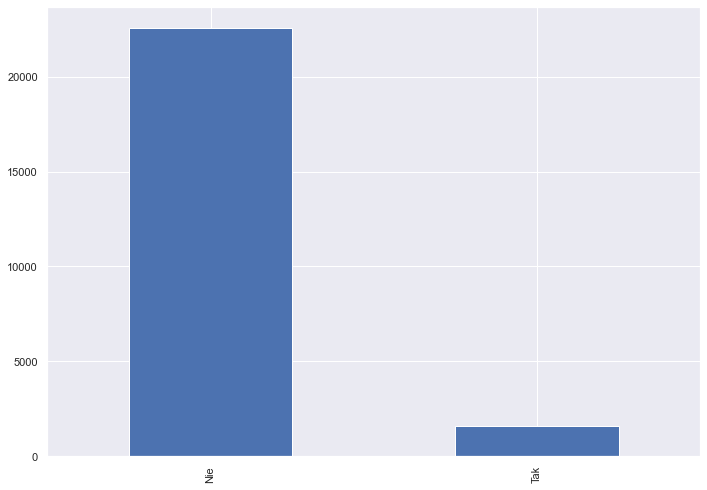

church_topics


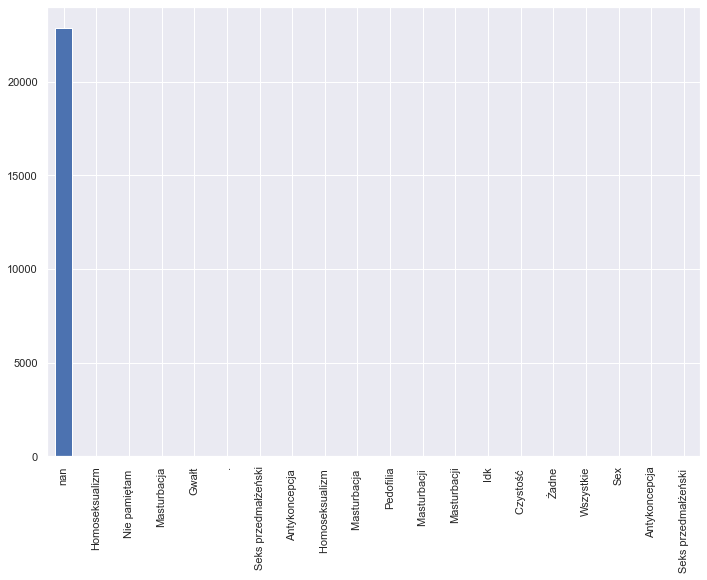

sexed_topics


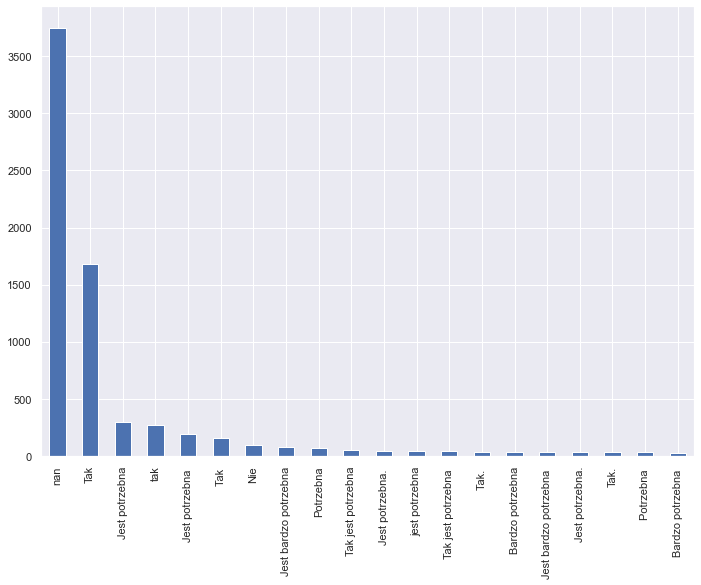

friend_unwanted_pregnancy_recommendation


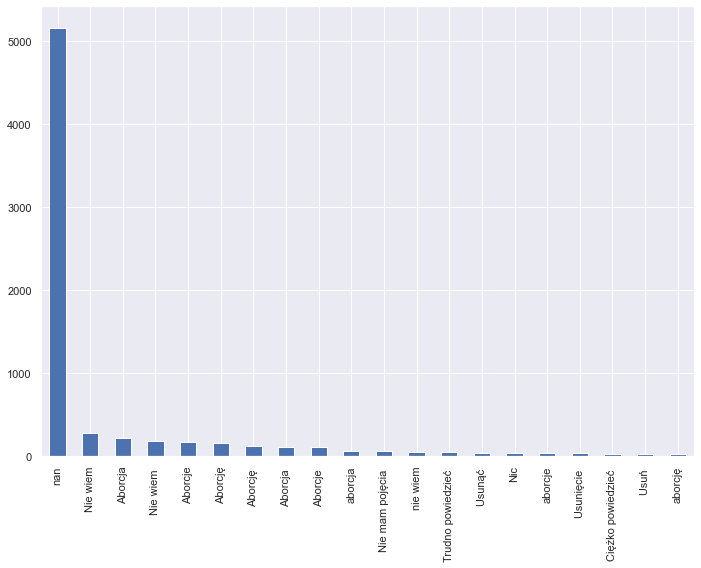

place_v


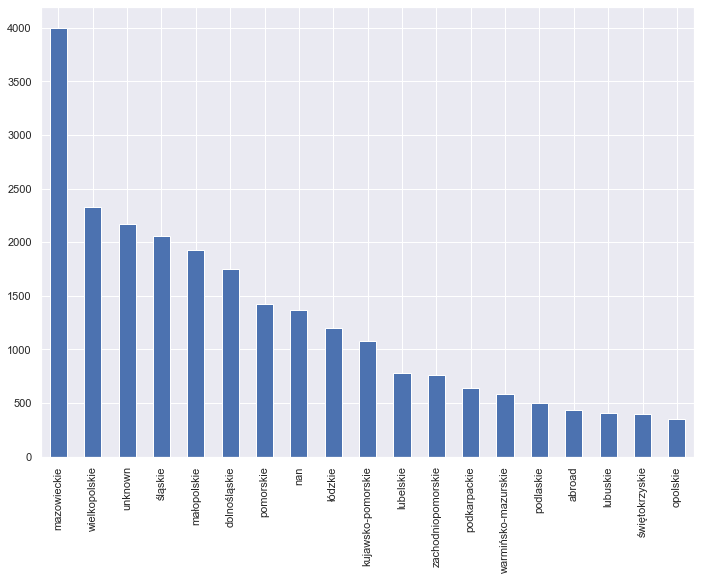

place_p


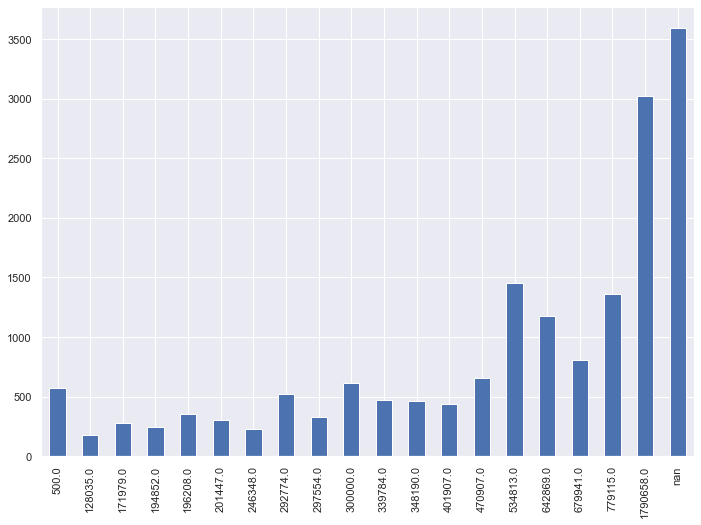

place_pc


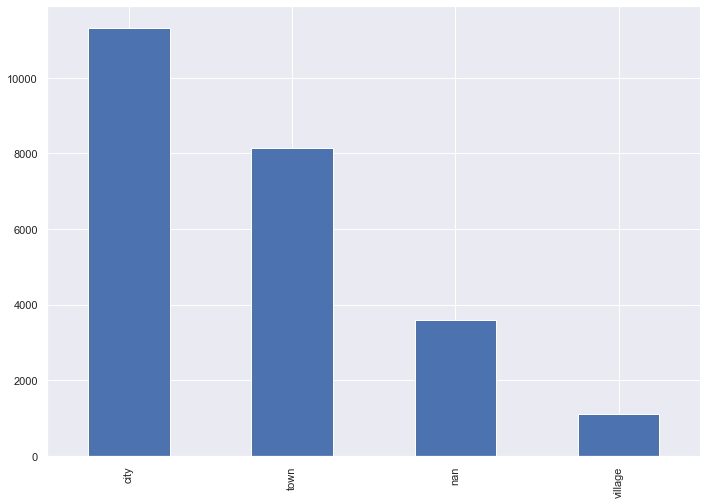

In [7]:
for c in survey.columns.tolist()[:-36]:
    print(c)
    if survey[c].dtype == 'float64':
        survey[c].value_counts(dropna=False).head(20).sort_index().plot.bar()
    elif survey[c].dtype == 'int64':
        survey[c].value_counts(dropna=False).head(20).sort_index().plot.bar()
    else:
        survey[c].value_counts(dropna=False).head(20).plot.bar()
    plt.show()

In [8]:
bools = ['if_condom_breaks',
       'what_prevents_stds', 'method_100%_prevents_pregnancy',
         'sexed_topics_label_masturb',
 'sexed_topics_label_contraception',
 'sexed_topics_label_abortion',
 'sexed_topics_label_idk',
 'sexed_topics_label_orient',
 'sexed_topics_label_nfp',
 'sexed_topics_label_pedophilia',
 'sexed_topics_label_violence',
 'sexed_topics_label_values',
 'sexed_topics_label_stis',
 'sexed_topics_label_porn',
 'pregnancy_label_abort',
 'pregnancy_label_adopt',
 'pregnancy_label_raise',
 'pregnancy_label_idk',
 'pregnancy_label_seek_help',
 'pregnancy_label_her_choice',
 'pregnancy_label_give_birth',
 'pregnancy_label_support']

In [9]:
knowledge = ['co zrobić, gdy pęknie gumka?','co zapobiega chorobom?','co zapobiega 100% ciąży?']

sexed_topics= ['masturbację',
 'antykoncepcję',
 'aborcję',
 'nie wiem',
 'orientację',
 'NPR',
 'pedofilię',
 'przemoc',
 'wartości/postawy/relacje',
 'choroby i infekcje (STI/STD)',
 'pornografię']

pregnancy_label = [ 'abortuj',
 'oddaj do adopcji',
 'wychowaj',
 'nie wiem co doradzić',
 'szukaj pomocy u bliskich/specjalistów',
 'to Twój wybór',
 'uródź, nie usuwaj',
 'będę Cię wspierać']

In [10]:
verbose_cols = ['co zrobić, gdy pęknie gumka?','co zapobiega chorobom?','co zapobiega 100% ciąży?',
                'masturbację',
 'antykoncepcję',
 'aborcję',
 'nie wiem',
 'orientację',
 'NPR',
 'pedofilię',
 'przemoc',
 'wartości/postawy/relacje',
 'choroby i infekcje (STI/STD)',
 'pornografię',
 'abortuj',
 'oddaj do adopcji',
 'wychowaj',
 'nie wiem co doradzić',
 'szukaj pomocy u bliskich/specjalistów',
 'to Twój wybór',
 'uródź, nie usuwaj',
 'będę Cię wspierać']

In [11]:
def visualize(cat):
    bools.append(cat)

    grouped = survey[bools].groupby(cat).mean() * 100
    grouped.columns = verbose_cols
    
    grouped[knowledge].plot.bar(title='Jak dobrze znasz tematy sexed?',
                                   ylabel='Częstość występowania prawidłowej odpowiedzi (%)')

    grouped[sexed_topics].plot.bar(title='Jakie tematy powinna zawierać edukacja seksualna w szkole?',
                                   ylabel='Częstość występowania danej odpowiedzi (%)')
    plt.show()
    grouped[pregnancy_label].plot.bar(title='Co doradził(a)byś bliskiej osobie w niechcianej ciąży?',
                                   ylabel='Częstość występowania danej odpowiedzi (%)')
    plt.show()
    bools.pop()

## Szukanie korelacji

Wybrałem kilka kategorii: płeć, sytuacja ekonomiczna, bycie w związku, bycie po pierwszym razie, religijność, uczęszczanie do kościoła i wielkość miejsca zamieszkania, i sprawdzałem, na ile różnią się odpowiedzi na pytania o wiedzę, o potrzeby sexedowe w szkole i o niechcianą ciążę. Tutaj mam nadzieję, że wykresy się same tłumaczą, jeśli tak nie jest, dajcie znać :)

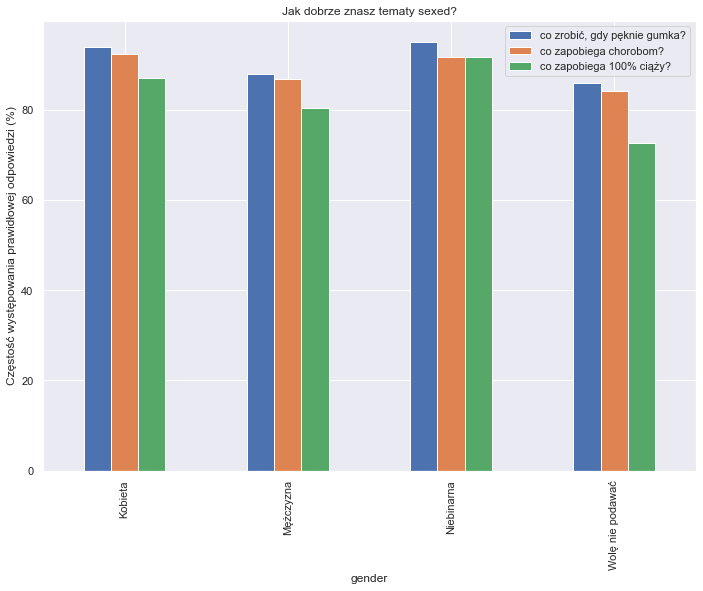

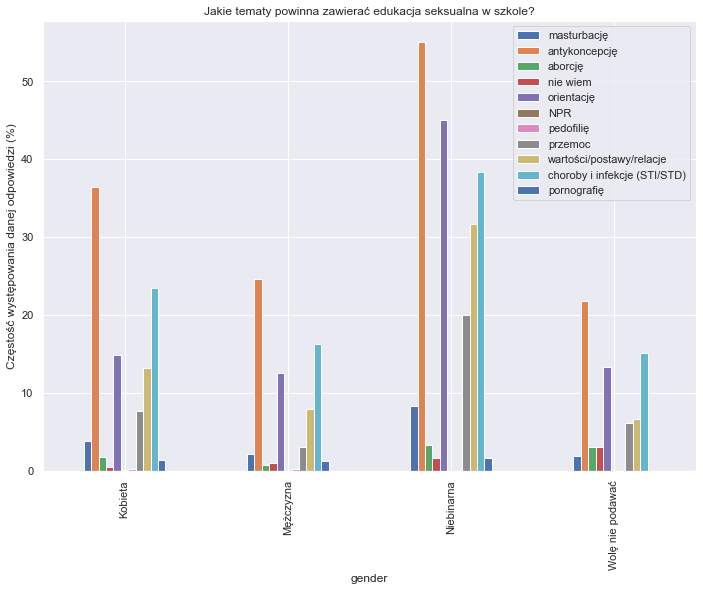

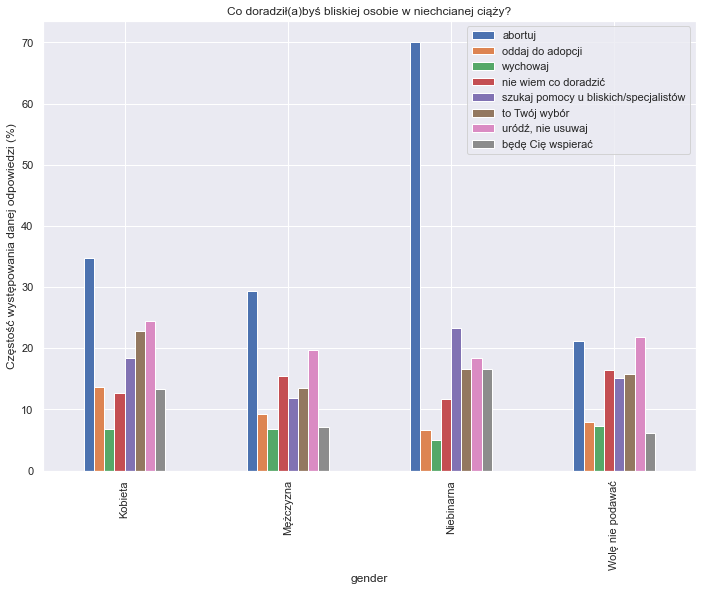

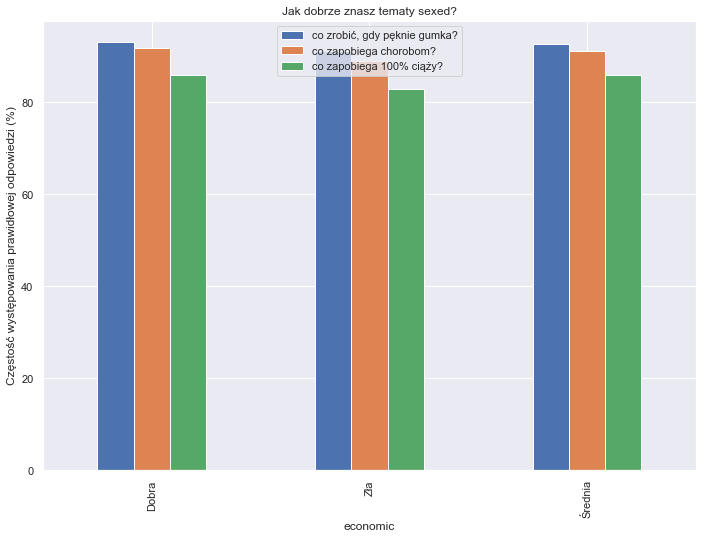

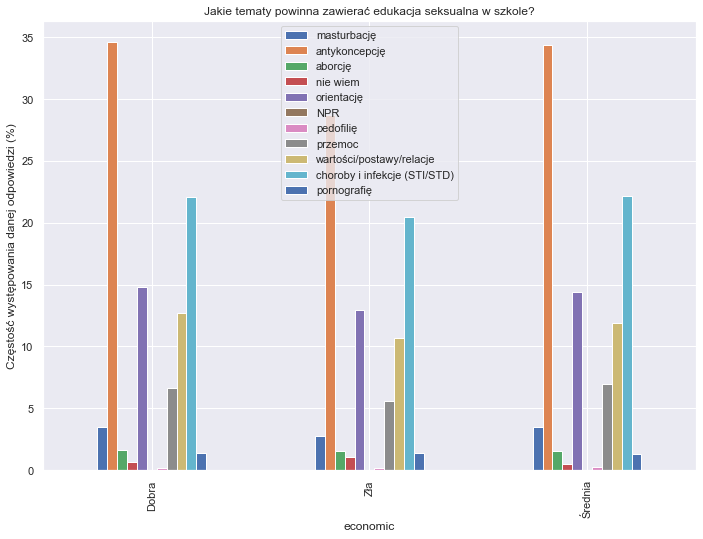

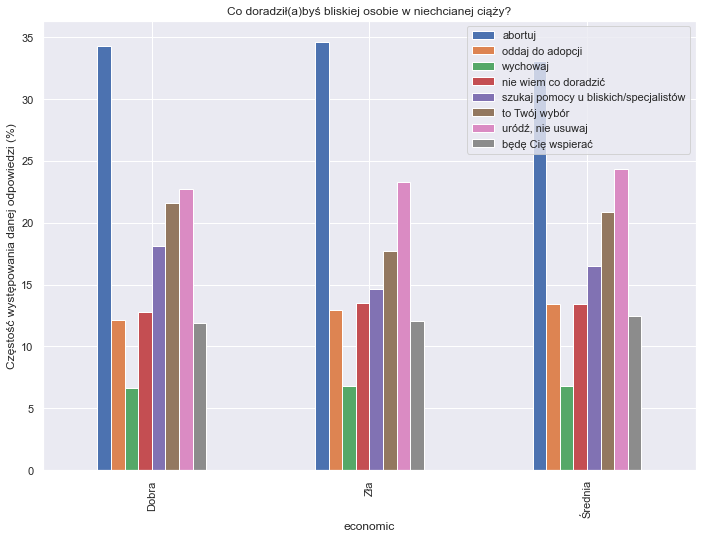

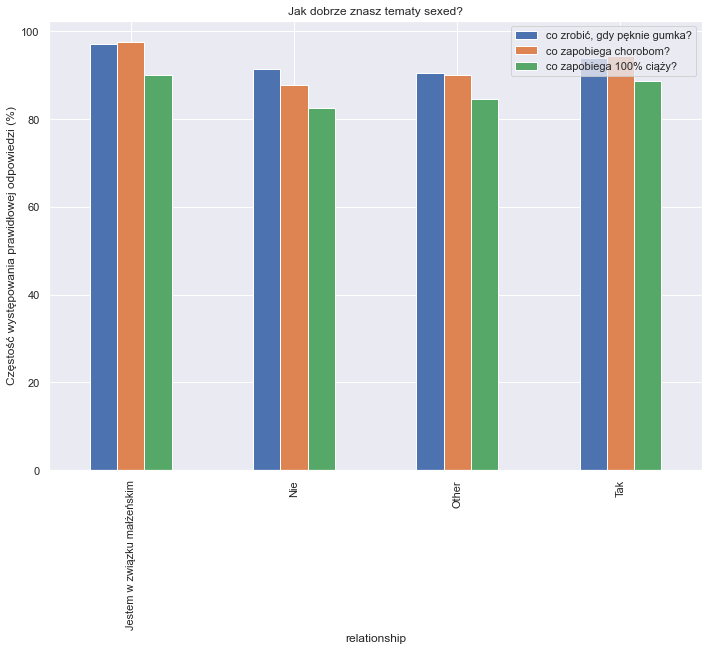

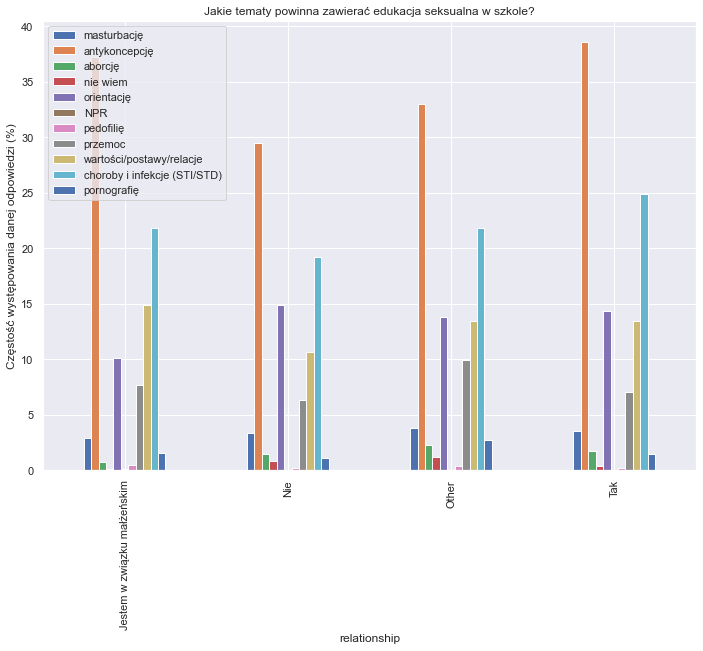

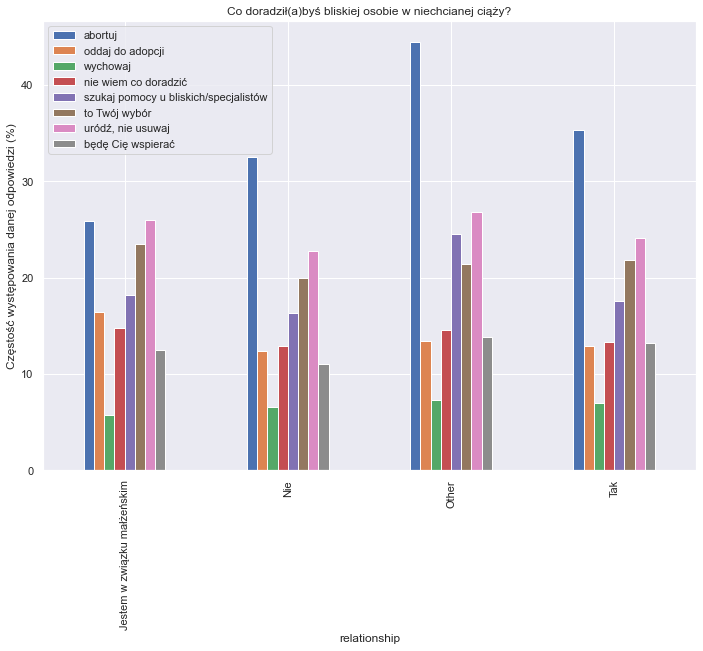

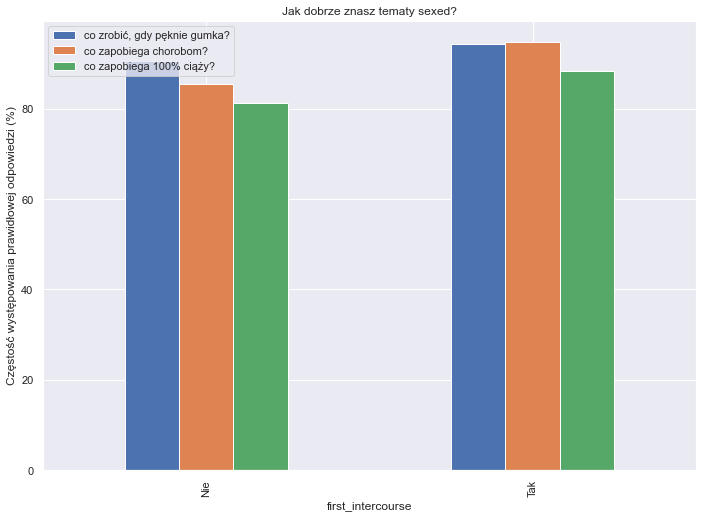

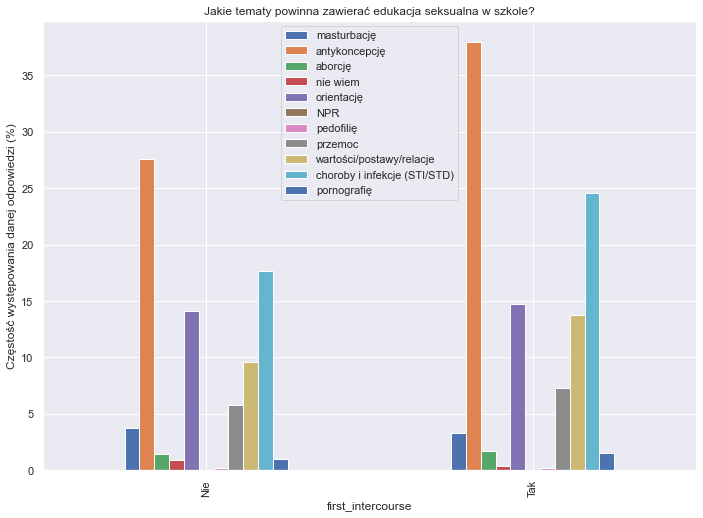

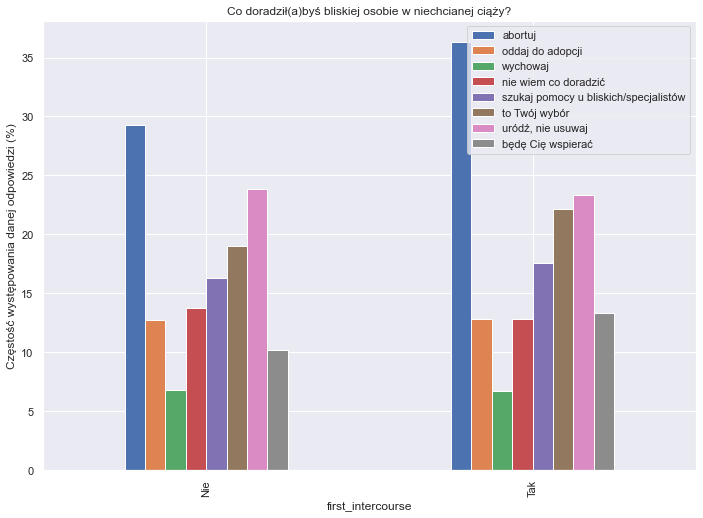

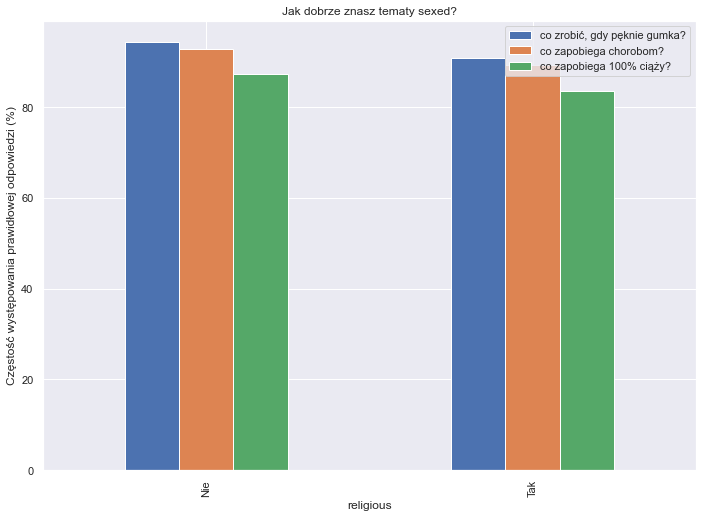

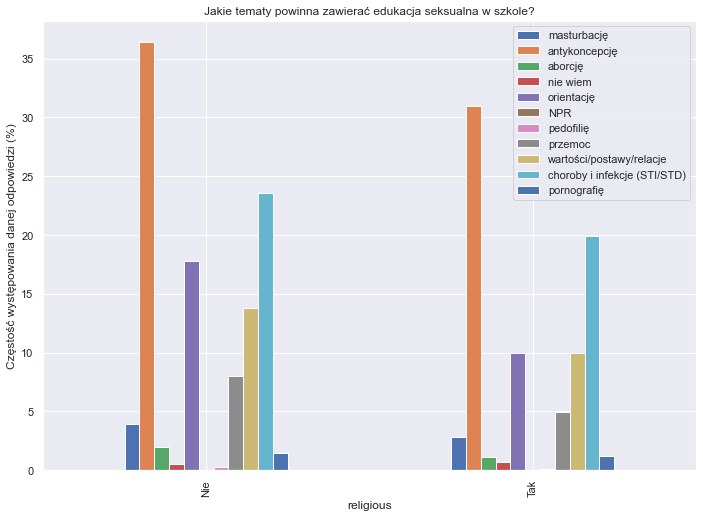

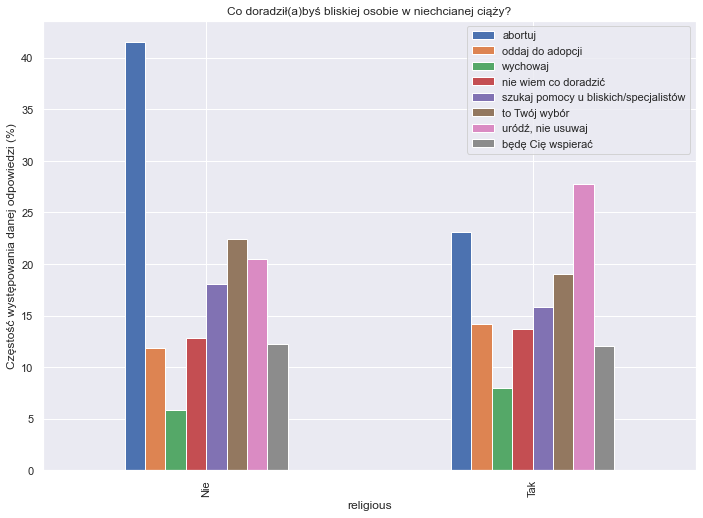

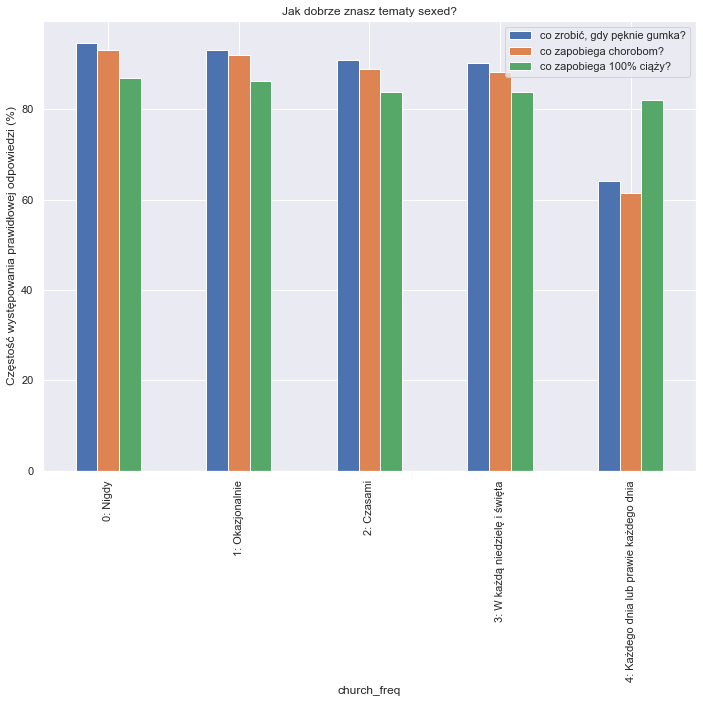

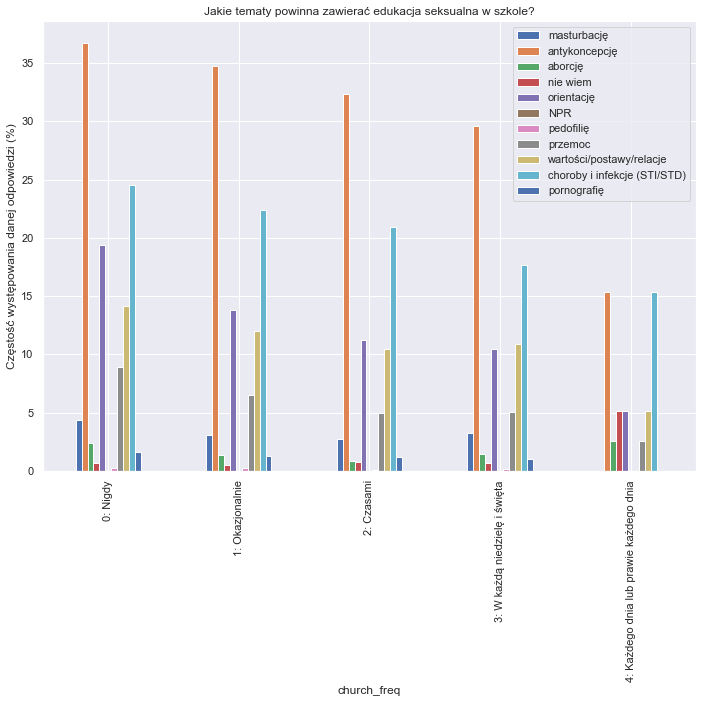

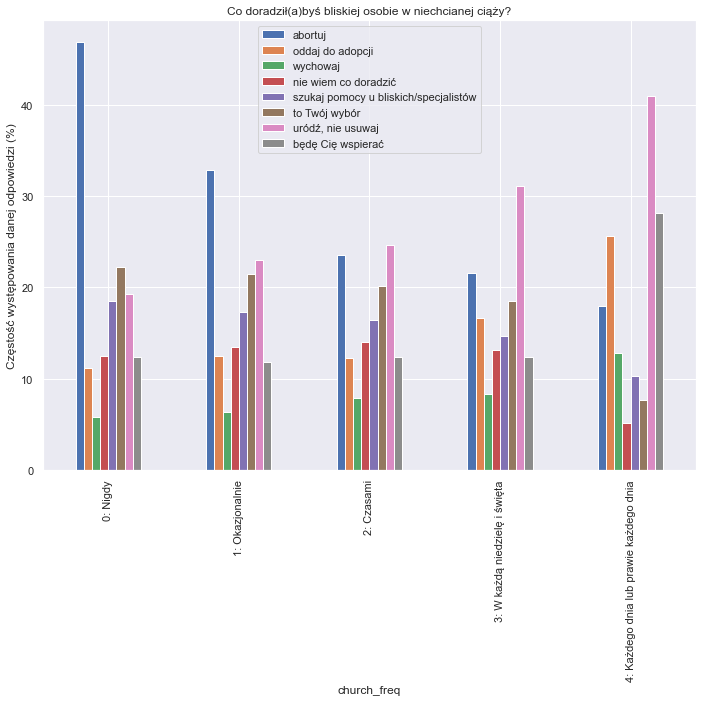

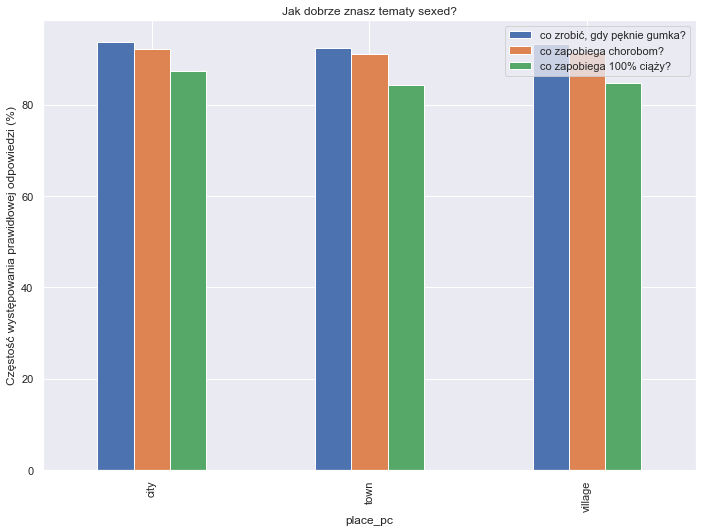

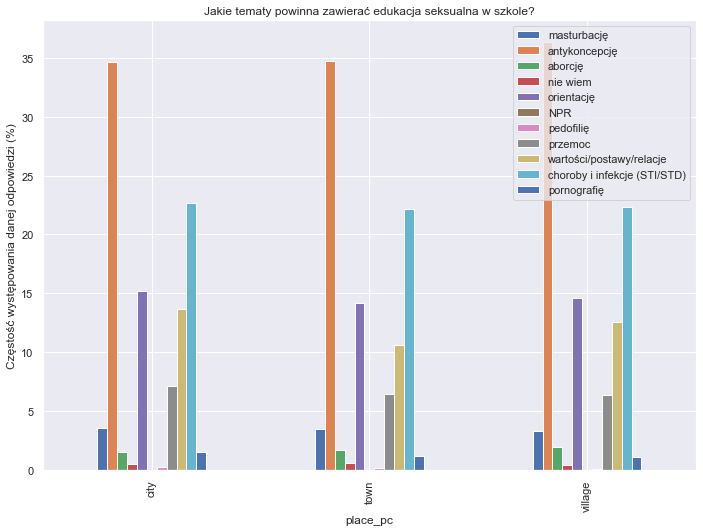

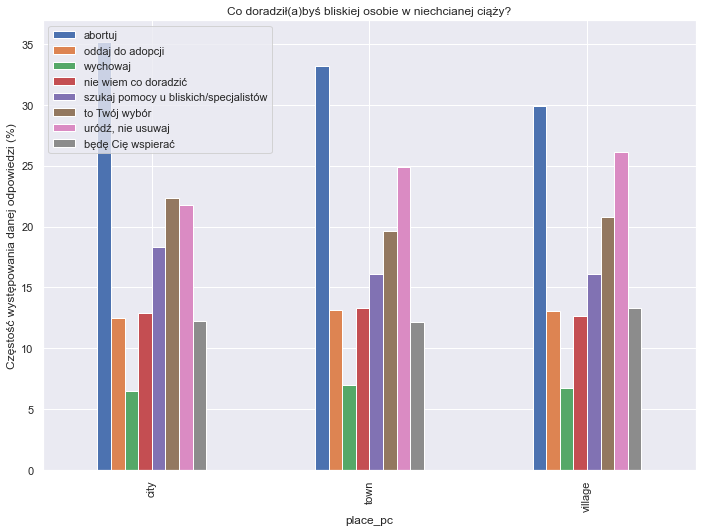

In [12]:
for cat in ['gender', 'economic', 'relationship', 'first_intercourse', 'religious',
            'church_freq', 'place_pc']:

    visualize(cat)

In [28]:
poland=gpd.read_file("v_pl.shp")

In [14]:
poland.columns

Index(['JPT_SJR_KO', 'JPT_KOD_JE', 'JPT_NAZWA_', 'JPT_ORGAN_', 'JPT_JOR_ID',
       'WERSJA_OD', 'WERSJA_DO', 'WAZNY_OD', 'WAZNY_DO', 'JPT_KOD__1',
       'JPT_NAZWA1', 'JPT_ORGAN1', 'JPT_WAZNA_', 'ID_BUFORA_', 'ID_BUFORA1',
       'ID_TECHNIC', 'IIP_PRZEST', 'IIP_IDENTY', 'IIP_WERSJA', 'JPT_KJ_IIP',
       'JPT_KJ_I_1', 'JPT_KJ_I_2', 'JPT_OPIS', 'JPT_SPS_KO', 'ID_BUFOR_1',
       'JPT_ID', 'JPT_KJ_I_3', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

In [15]:
poland.JPT_NAZWA_ = ['śląskie',
 'opolskie',
 'wielkopolskie',
 'zachodniopomorskie',
 'świętokrzyskie',
 'kujawsko-pomorskie',
 'podlaskie',
 'dolnośląskie',
 'podkarpackie',
 'małopolskie',
 'pomorskie',
 'warmińsko-mazurskie',
 'łódzkie',
 'mazowieckie',
 'lubelskie',
 'lubuskie']

In [16]:
poland.JPT_NAZWA_

0                 śląskie
1                opolskie
2           wielkopolskie
3      zachodniopomorskie
4          świętokrzyskie
5      kujawsko-pomorskie
6               podlaskie
7            dolnośląskie
8            podkarpackie
9             małopolskie
10              pomorskie
11    warmińsko-mazurskie
12                łódzkie
13            mazowieckie
14              lubelskie
15               lubuskie
Name: JPT_NAZWA_, dtype: object

In [17]:
survey.place_v.value_counts()

mazowieckie            3995
wielkopolskie          2326
unknown                2174
śląskie                2058
małopolskie            1926
dolnośląskie           1748
pomorskie              1426
łódzkie                1195
kujawsko-pomorskie     1075
lubelskie               781
zachodniopomorskie      757
podkarpackie            637
warmińsko-mazurskie     584
podlaskie               496
abroad                  433
lubuskie                410
świętokrzyskie          401
opolskie                353
Name: place_v, dtype: int64

In [18]:
voivod = survey.groupby(by='place_v').mean()
voivod.head()

age  age_first_intercourse  \
place_v                                                
abroad              23.838337              17.768194   
dolnośląskie        20.560069              17.246633   
kujawsko-pomorskie  19.723256              17.240826   
lubelskie           19.684379              17.523656   
lubuskie            19.724390              17.218623   

                    religion_impact_sex_life_0-10  \
place_v                                             
abroad                                   1.247113   
dolnośląskie                             1.353547   
kujawsko-pomorskie                       1.218605   
lubelskie                                1.896287   
lubuskie                                 0.978049   

                    first_heard_any_sex_activity  first_heard_how_conception  \
place_v                                                                        
abroad                                 10.912240                   11.411085   
dolnośląskie                           10.354119                   10.962815   
kujawsko-pomorskie                     10.607442                   11.142326   
lubelskie                              10.796415                   11.455826   
lubuskie                               10.607317                   11.075610   

                    first_heard_pleasures_sex  sex_info_source_parents  \
place_v                                                                  
abroad                              12.792148                 0.771363   
dolnośląskie                        12.361556                 0.815503   
kujawsko-pomorskie                  12.431628                 0.833488   
lubelskie                           12.804097                 0.637644   
lubuskie                            12.509756                 0.887805   

                    sex_info_source_colleagues  sex_info_source_school  \
place_v                                                                  
abroad                                1.931871                0.839492   
dolnośląskie                          2.016018                0.748856   
kujawsko-pomorskie                    2.046512                0.827287   
lubelskie                             1.957746                0.731114   
lubuskie                              1.997561                0.828049   

                    sex_info_source_social_media  sex_info_source_websites  \
place_v                                                                      
abroad                                  1.804850                  1.871824   
dolnośląskie                            1.975686                  2.031083   
kujawsko-pomorskie                      2.013798                  2.064496   
lubelskie                               2.049296                  2.093470   
lubuskie                                2.008537                  2.003659   

                    sex_info_source_books_magazines  sex_info_source_porn  \
place_v                                                                     
abroad                                     1.272517              1.168591   
dolnośląskie                               1.308638              1.165618   
kujawsko-pomorskie                         1.187442              1.210078   
lubelskie                                  1.242638              1.077465   
lubuskie                                   1.138211              1.175610   

                    sex_info_source_doctors  sex_info_source_church  \
place_v                                                               
abroad                             0.981524                0.115473   
dolnośląskie                       0.826754                0.136728   
kujawsko-pomorskie                 0.758140                0.136744   
lubelskie                          0.763124                0.208707   
lubuskie                           0.782927                0.103659   

                    comfort_on_sexed_school  comfort_on_sex_talks_parents  \


In [19]:
voivod.drop(['abroad','unknown'],inplace=True)
voivod.head(30)

age  age_first_intercourse  \
place_v                                                 
dolnośląskie         20.560069              17.246633   
kujawsko-pomorskie   19.723256              17.240826   
lubelskie            19.684379              17.523656   
lubuskie             19.724390              17.218623   
mazowieckie          20.561952              17.464658   
małopolskie          20.327622              17.572476   
opolskie             20.594901              17.142857   
podkarpackie         19.908948              17.259542   
podlaskie            20.173387              17.472131   
pomorskie            20.399369              17.328631   
warmińsko-mazurskie  19.740582              17.070845   
wielkopolskie        20.042347              17.288164   
zachodniopomorskie   19.923382              17.013655   
łódzkie              19.987866              17.373016   
śląskie              20.107872              17.222011   
świętokrzyskie       18.937656              17.031532   

                     religion_impact_sex_life_0-10  \
place_v                                              
dolnośląskie                              1.353547   
kujawsko-pomorskie                        1.218605   
lubelskie                                 1.896287   
lubuskie                                  0.978049   
mazowieckie                               1.498123   
małopolskie                               1.850467   
opolskie                                  1.444759   
podkarpackie                              1.940345   
podlaskie                                 1.812500   
pomorskie                                 1.300842   
warmińsko-mazurskie                       1.306507   
wielkopolskie                             1.404127   
zachodniopomorskie                        0.994716   
łódzkie                                   1.251883   
śląskie                                   1.381438   
świętokrzyskie                            1.319202   

                     first_heard_any_sex_activity  first_heard_how_conception  \
place_v                                                                         
dolnośląskie                            10.354119                   10.962815   
kujawsko-pomorskie                      10.607442                   11.142326   
lubelskie                               10.796415                   11.455826   
lubuskie                                10.607317                   11.075610   
mazowieckie                             10.490363                   11.027534   
małopolskie                             10.668224                   11.245067   
opolskie                                10.750708                   11.274788   
podkarpackie                            10.883830                   11.513344   
podlaskie                               10.725806                   11.364919   
pomorskie                               10.720898                   11.187237   
warmińsko-mazurskie                     10.715753                   11.174658   
wielkopolskie                           10.668100                   11.249355   
zachodniopomorskie                      10.441215                   11.003963   
łódzkie                                 10.514644                   11.217573   
śląskie                                 10.588678                   11.165209   
świętokrzyskie                          10.695761                   11.341646   

                     first_heard_pleasures_sex  sex_info_source_parents  \
place_v                                                                   
dolnośląskie                         12.361556                 0.815503   
kujawsko-pomorskie                   12.431628                 0.833488   
lubelskie                            12.804097                 0.637644   
lubuskie                             12.509756                 0.887805   
mazowieckie                          12.438798                 0.803755   
małopolskie                          12.557

In [20]:
poland = poland.merge(voivod, left_on='JPT_NAZWA_',right_index=True)

## Geografia

Poniżej w kilku komórkach przedstawiam regionalny rozkład poszczególnych odpowiedzi. 'e_e_num' to kolumna 'ever_experienced' przełożona na wartości liczbowe (0: nic mnie nie spotkało, 5: niechciana czynność seksualna).

Czasem różnice między województwami wydają się znaczące, ale zawsze warto skonfrontować z wartościami na skali pod mapą (np. Podkarpacie wyróżnia się odpowiedziach z serii "first_heard", ale jest to maksymalnie 0.5 roku różnicy między najwyższą a najniższą średnią wartością).

### Przeżyte doświadczenia

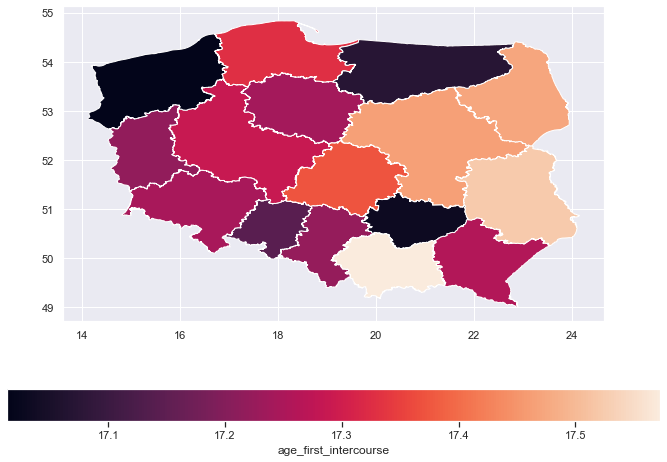

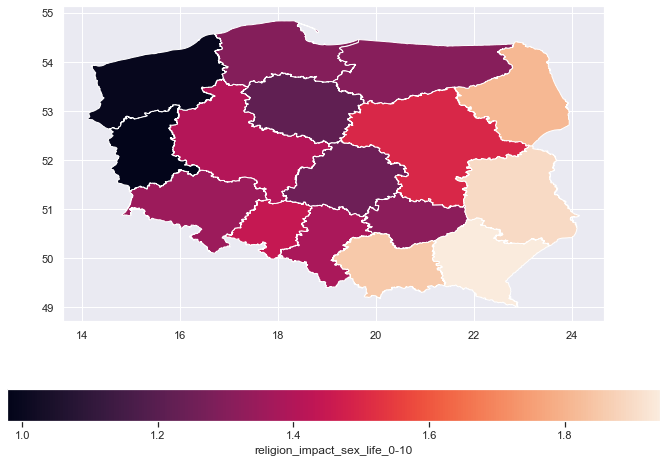

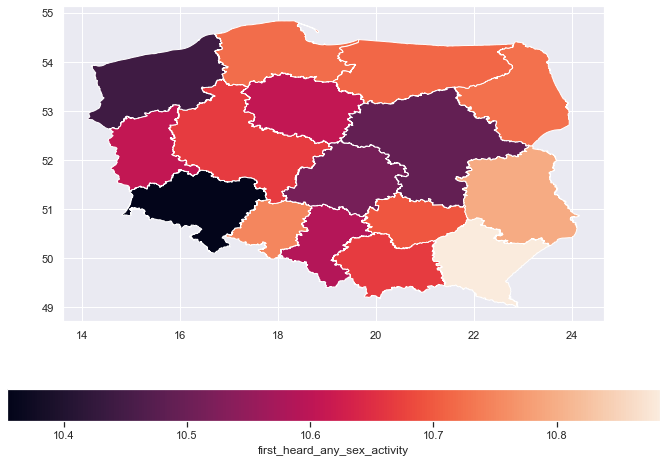

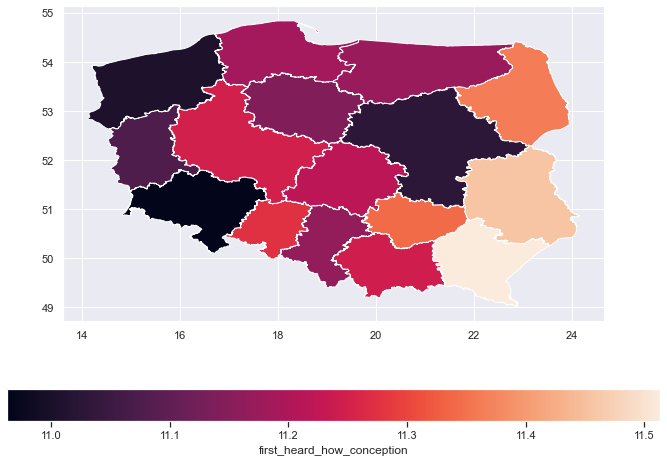

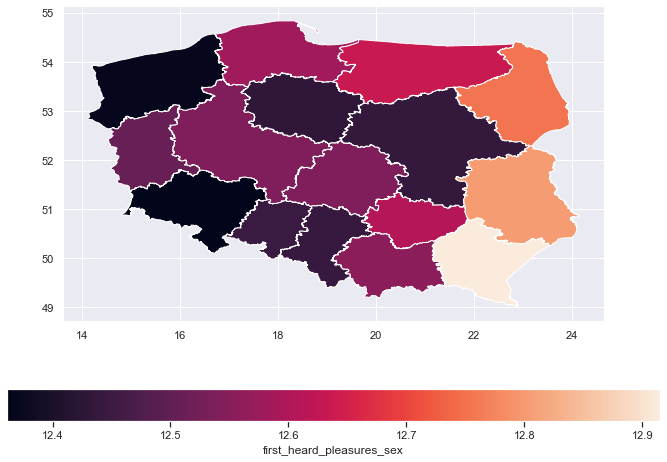

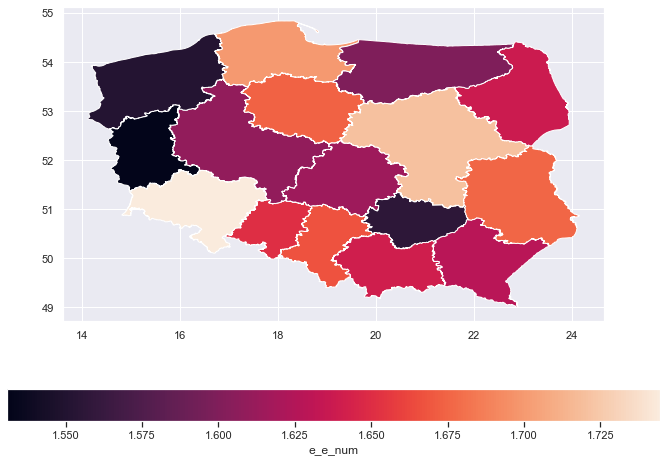

In [26]:
for col in ['age_first_intercourse',
       'religion_impact_sex_life_0-10', 'first_heard_any_sex_activity',
       'first_heard_how_conception', 'first_heard_pleasures_sex','e_e_num']:
        poland.plot(column=col,legend=True, legend_kwds={'label': col, 'orientation': "horizontal"})
        plt.show()

### Pytania z wiedzy

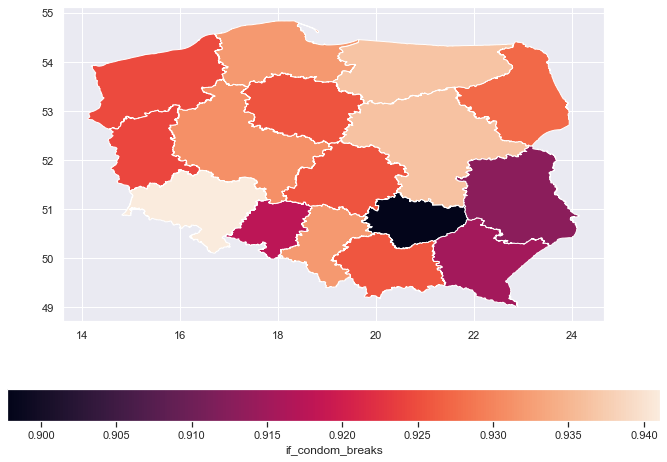

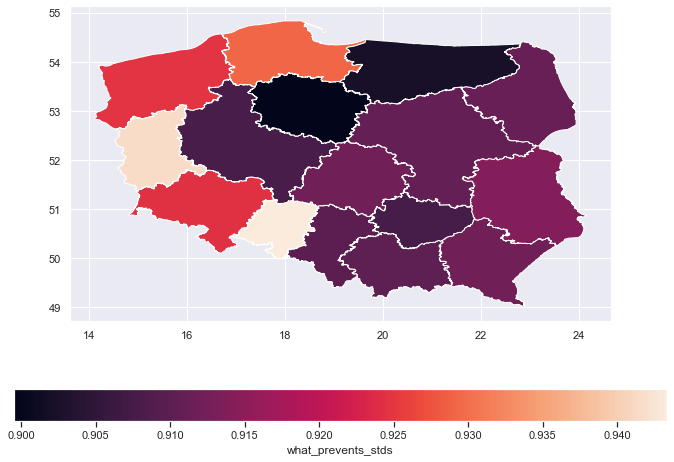

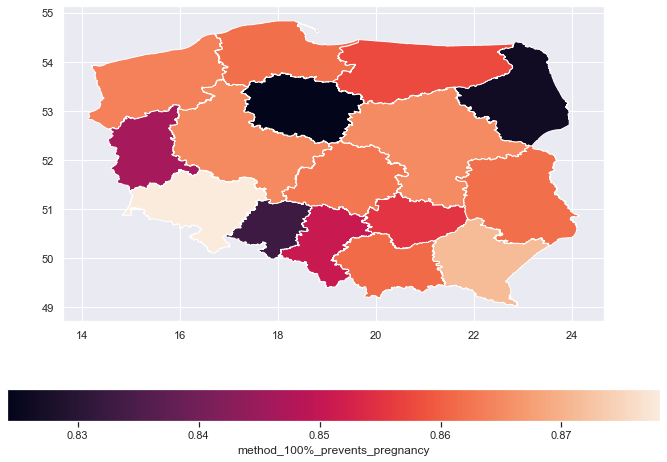

In [25]:
for col in ['if_condom_breaks',
       'what_prevents_stds', 'method_100%_prevents_pregnancy']:
        poland.plot(column=col,legend=True, legend_kwds={'label': col, 'orientation': "horizontal"})
        plt.show()

### Źródła wiedzy o seksie

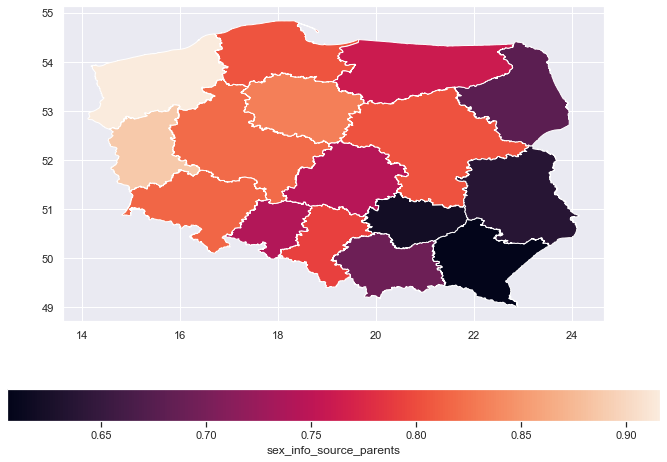

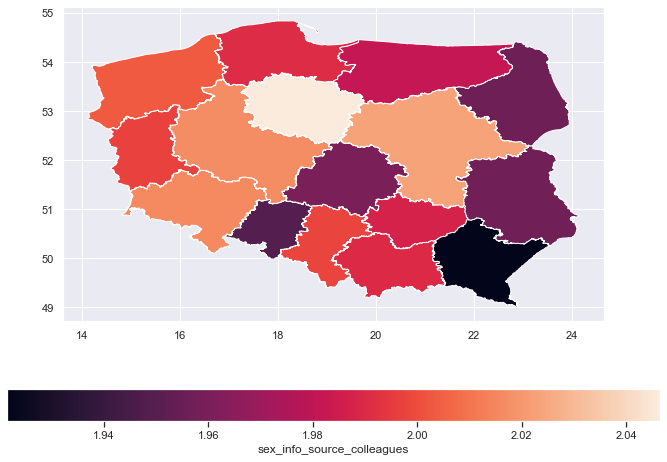

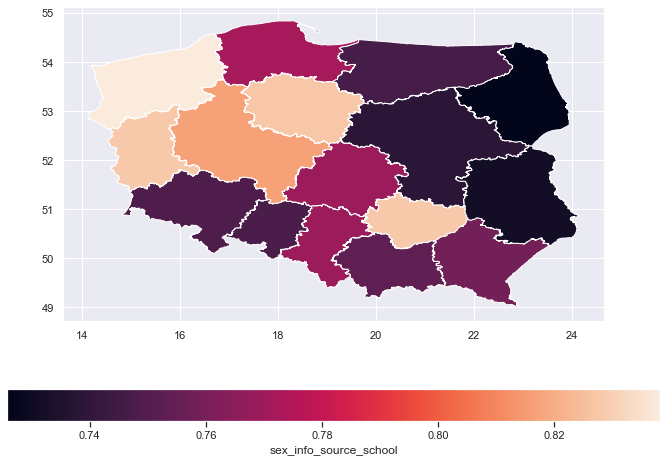

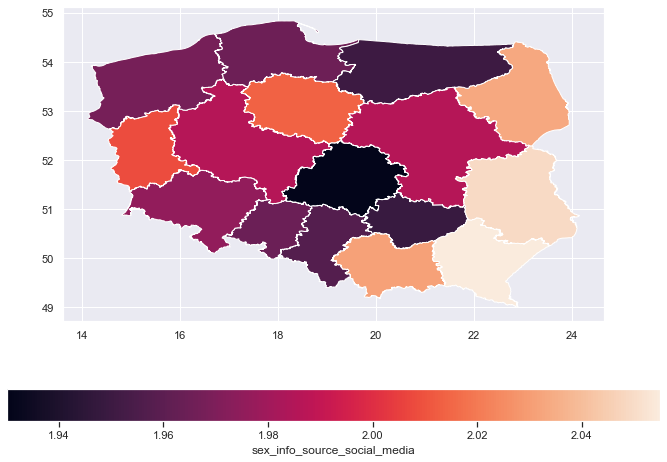

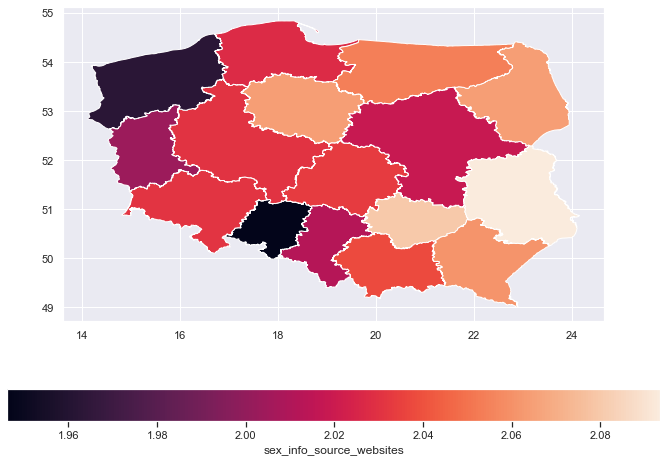

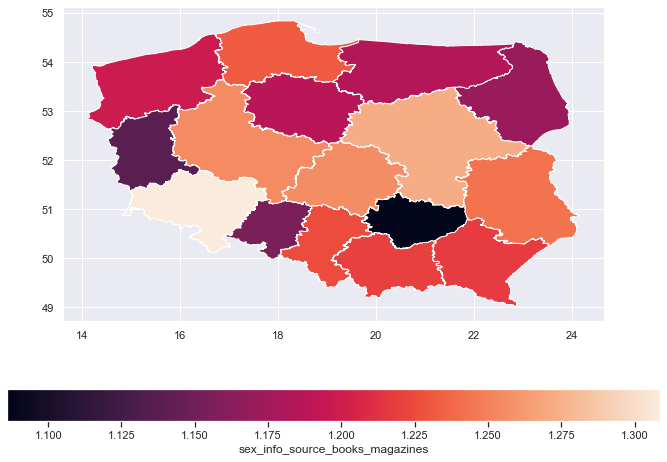

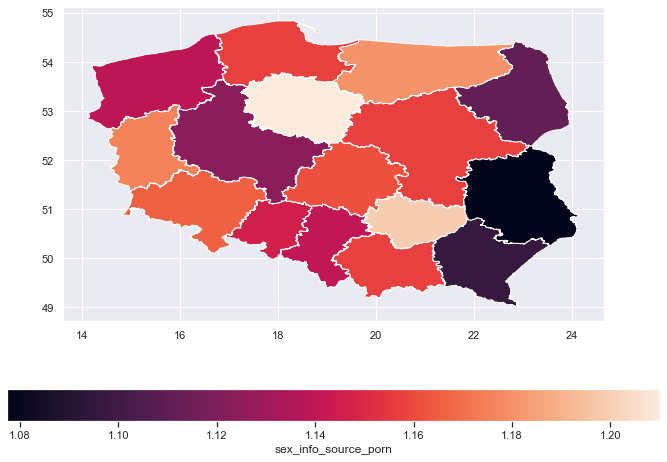

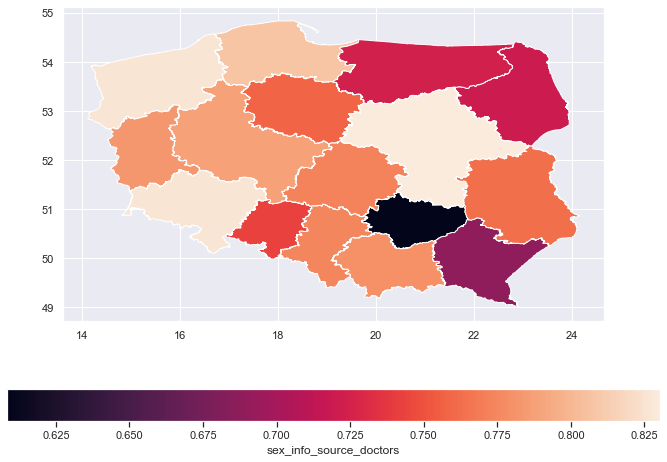

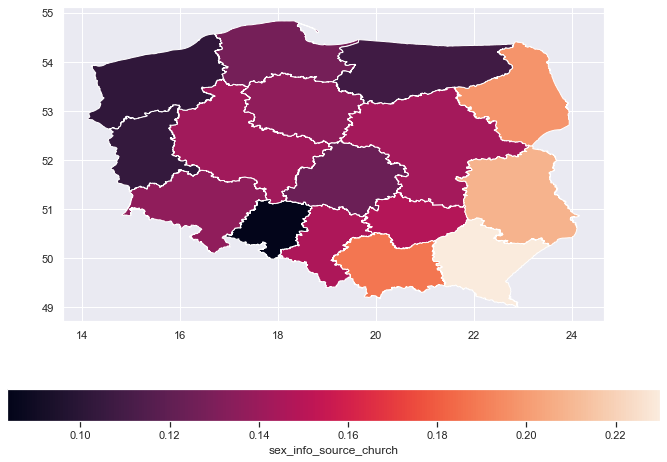

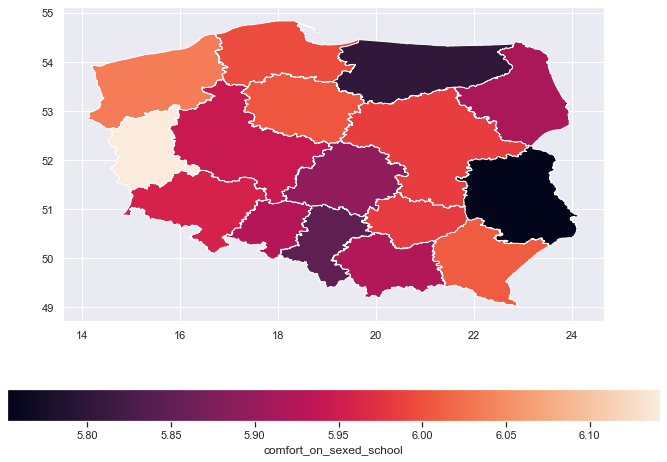

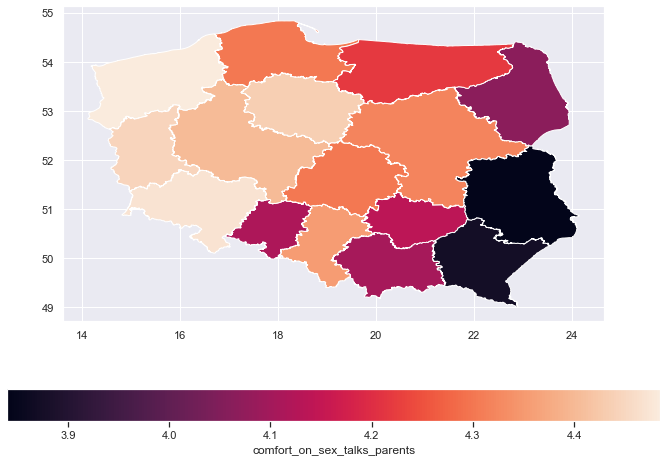

In [22]:
for col in ['sex_info_source_parents', 'sex_info_source_colleagues',
       'sex_info_source_school', 'sex_info_source_social_media',
       'sex_info_source_websites', 'sex_info_source_books_magazines',
       'sex_info_source_porn', 'sex_info_source_doctors',
       'sex_info_source_church', 'comfort_on_sexed_school',
       'comfort_on_sex_talks_parents']:
        poland.plot(column=col,legend=True, legend_kwds={'label': col, 'orientation': "horizontal"})
        plt.show()

### Jakie tematy powinna poruszać edukacja seksualna?

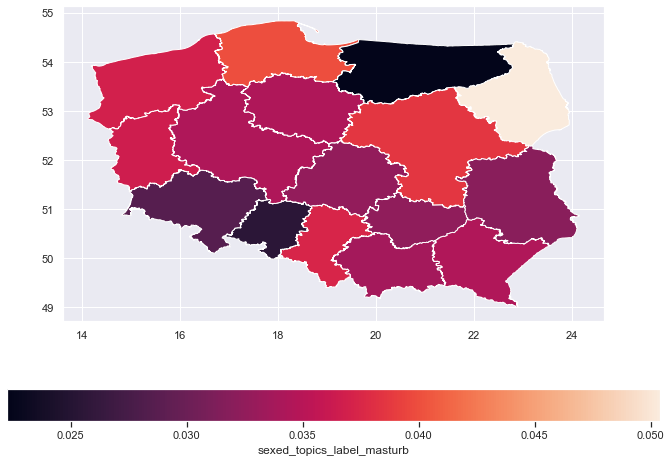

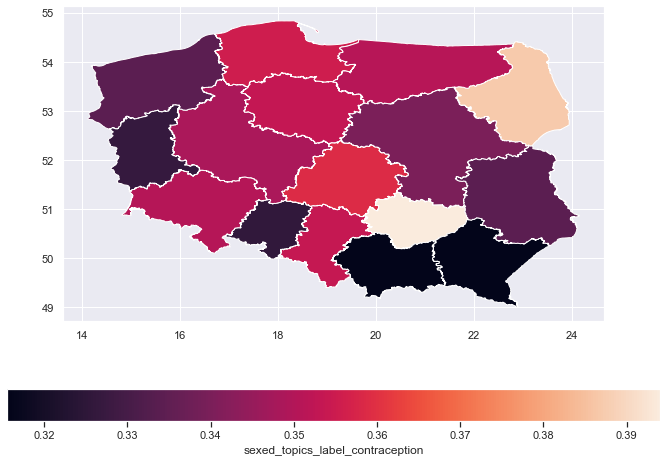

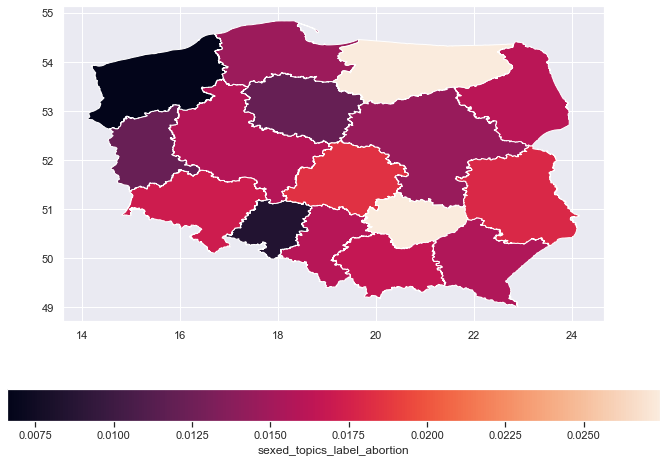

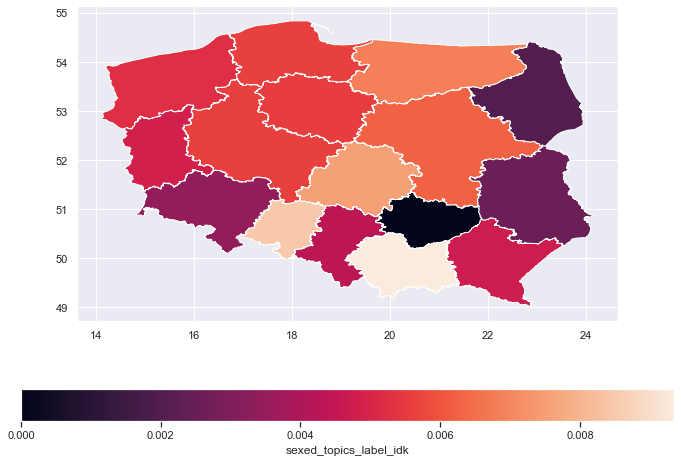

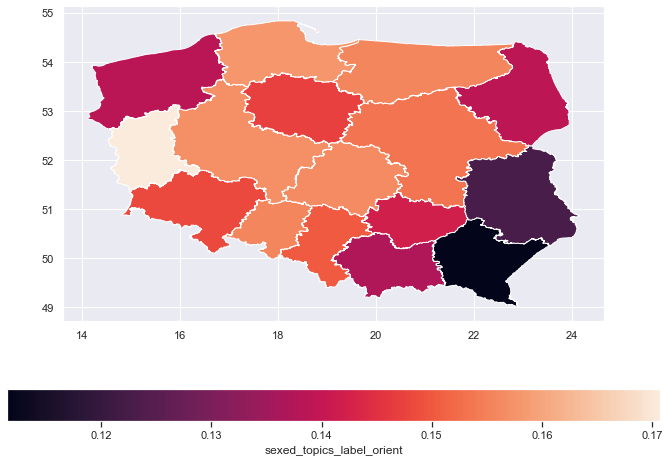

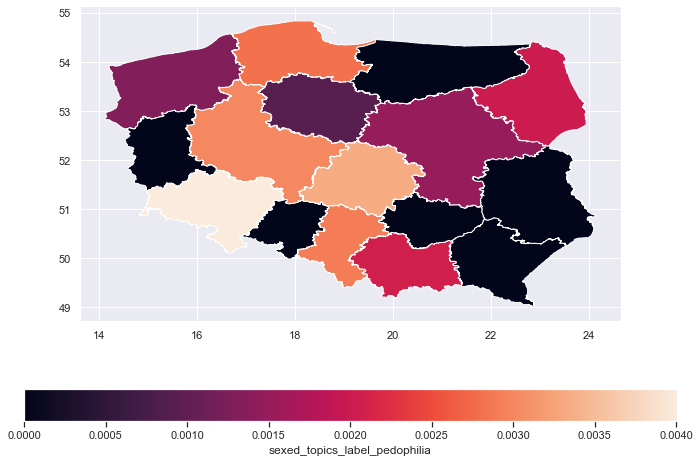

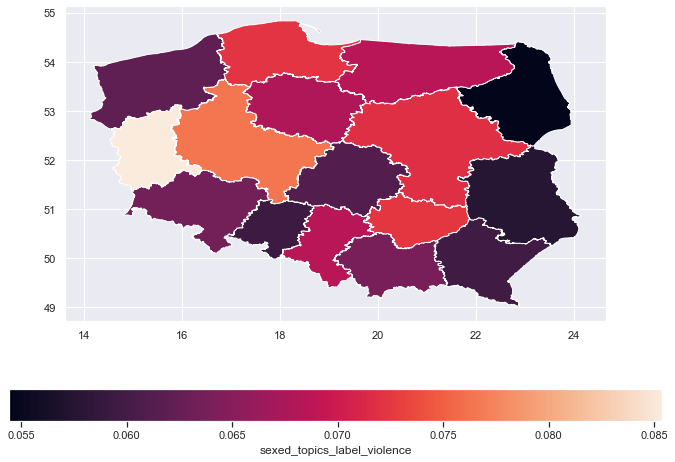

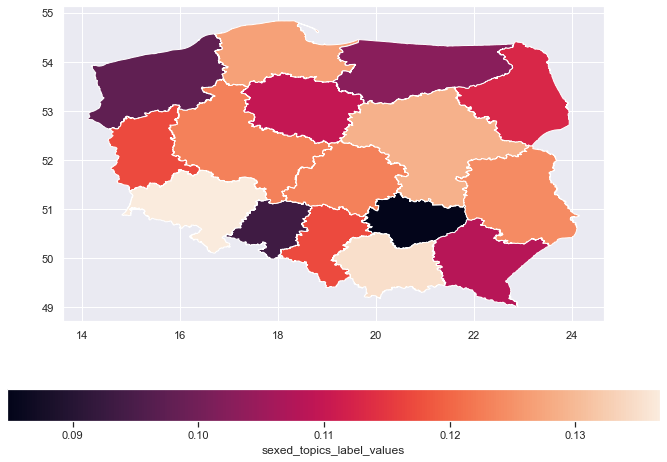

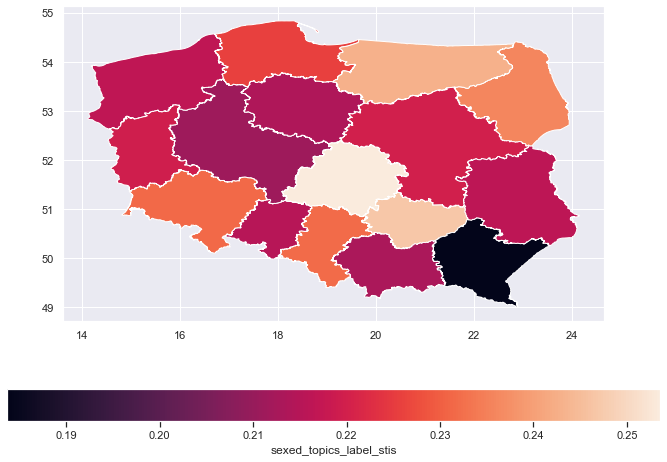

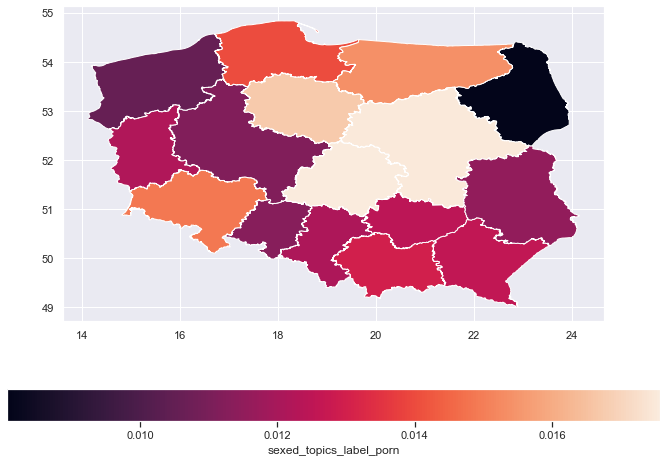

In [27]:
for col in ['sexed_topics_label_masturb', 'sexed_topics_label_contraception',
       'sexed_topics_label_abortion', 'sexed_topics_label_idk',
       'sexed_topics_label_orient', 
       'sexed_topics_label_pedophilia', 'sexed_topics_label_violence',
       'sexed_topics_label_values', 'sexed_topics_label_stis',
       'sexed_topics_label_porn']:
        poland.plot(column=col,legend=True, legend_kwds={'label': col, 'orientation': "horizontal"})
        plt.show()

### Co doradziłabyś osobie w niechcianej ciąży?

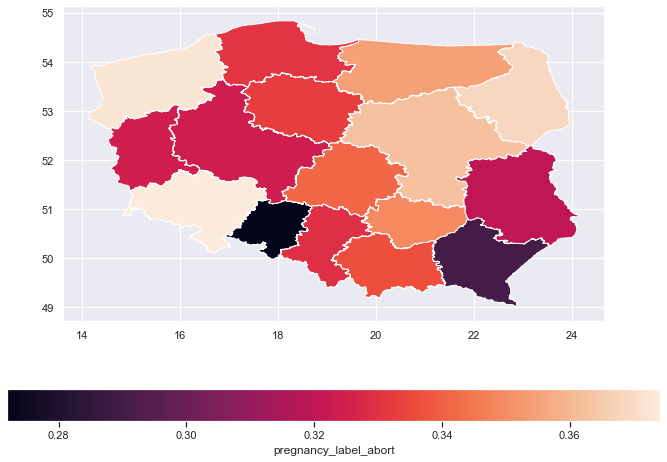

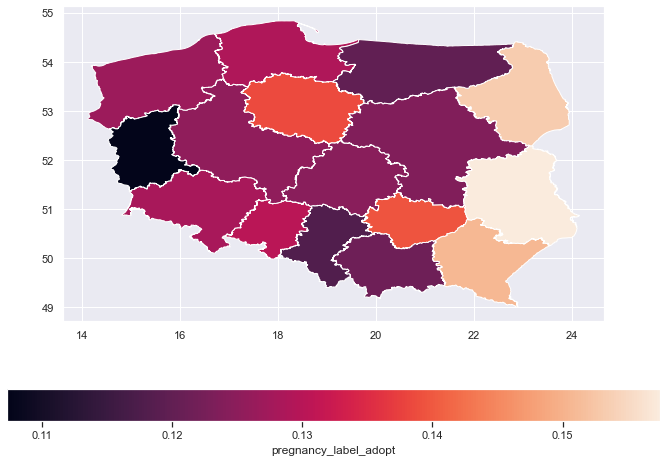

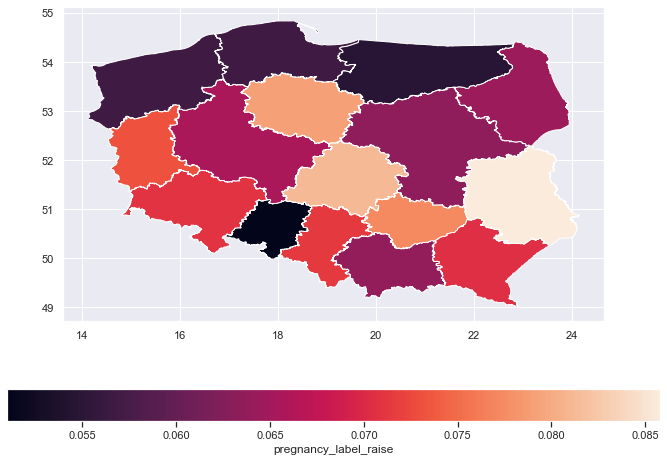

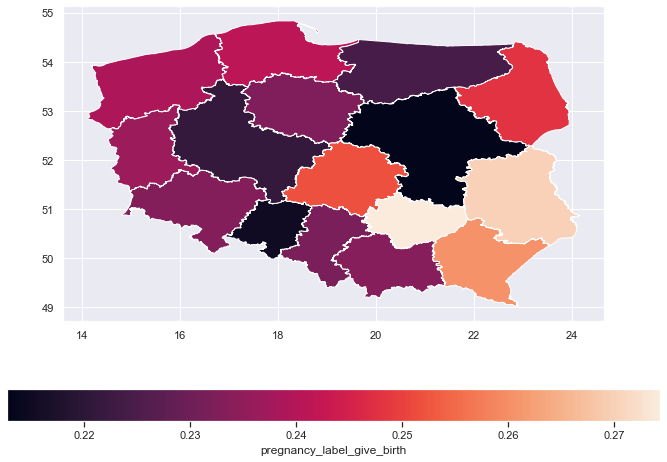

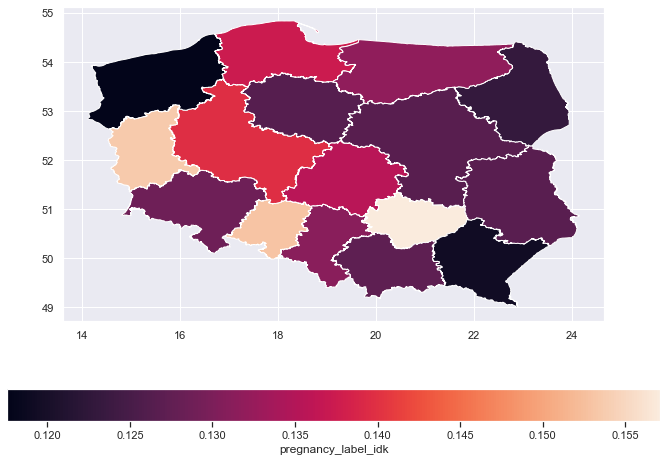

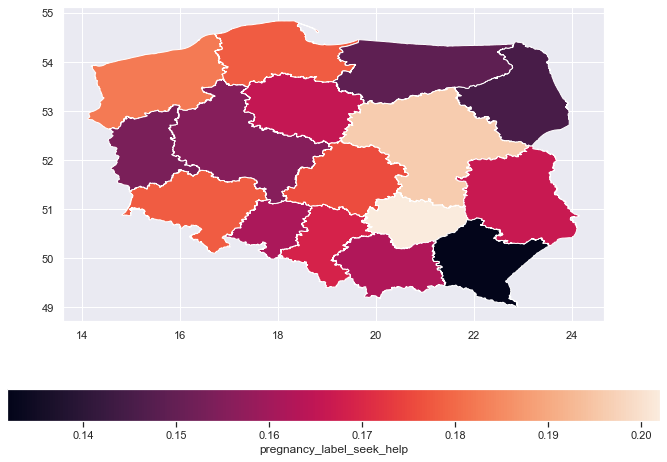

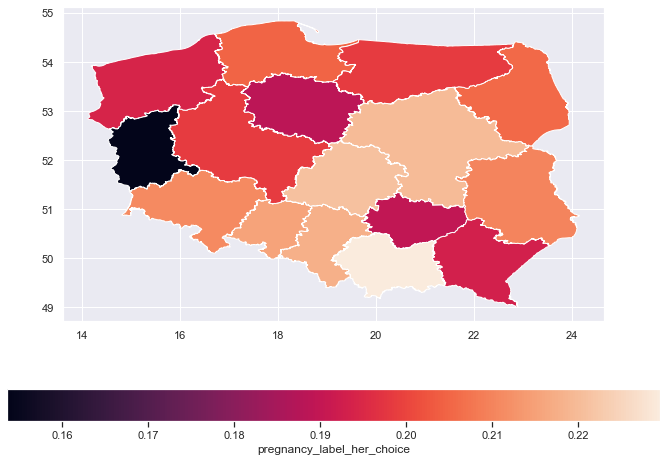

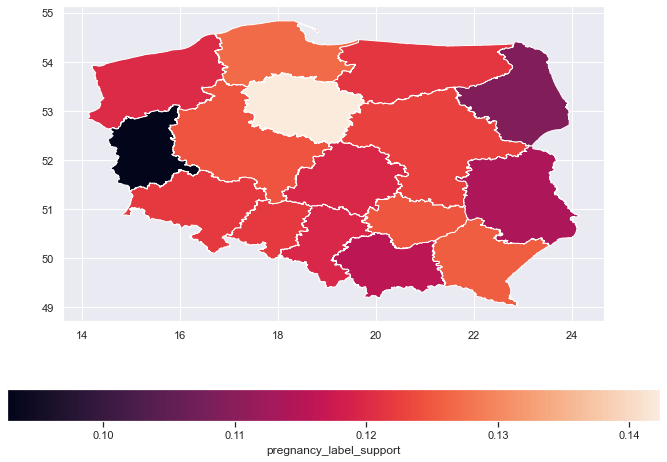

In [24]:
for col in ['pregnancy_label_abort',
       'pregnancy_label_adopt', 'pregnancy_label_raise',
       'pregnancy_label_give_birth', 'pregnancy_label_idk',
       'pregnancy_label_seek_help', 'pregnancy_label_her_choice',
       'pregnancy_label_support']:
        poland.plot(column=col,legend=True, legend_kwds={'label': col, 'orientation': "horizontal"})
        plt.show()